In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
# pd.set_option('display.max_columns', None)  # Adjust to display all columns
# pd.set_option('display.html.table_schema', True)  # Enable the interactive DataFrame representation

In [2]:
file_path = 'TII Training General Assessment - Non Disclosure (1).csv'
dataset = pd.read_csv(file_path, header=0)
dataset

Respondent ID  Collector ID              Start Date  \
0              NaN           NaN                     NaN   
1     1.144280e+11   427913904.0  10/04/2023 03:46:30 PM   
2     1.144280e+11   427913904.0  10/04/2023 12:39:43 PM   
3     1.144280e+11   427913904.0  10/04/2023 03:20:37 PM   
4     1.144280e+11   427913904.0  10/04/2023 01:07:49 PM   
..             ...           ...                     ...   
160   1.144230e+11   427913904.0  09/28/2023 01:35:28 PM   
161   1.144230e+11   427913904.0  09/28/2023 01:41:33 PM   
162   1.144230e+11   427913904.0  09/28/2023 01:35:26 PM   
163   1.144230e+11   427913904.0  09/28/2023 01:36:01 PM   
164   1.144230e+11   427913904.0  09/28/2023 01:35:43 PM   

                   End Date    IP Address  Email Address  First Name  \
0                       NaN           NaN            NaN         NaN   
1    10/04/2023 03:57:18 PM  2.50.149.139            NaN         NaN   
2    10/04/2023 03:36:03 PM  86.97.116.11            NaN         NaN   
3    10/04/2023 03:33:52 PM  2.50.149.139            NaN         NaN   
4    10/04/2023 03:27:47 PM  2.50.149.139            NaN         NaN   
..                      ...           ...            ...         ...   
160  09/28/2023 01:44:26 PM  83.110.1.129            NaN         NaN   
161  09/28/2023 01:44:17 PM  83.110.1.129            NaN         NaN   
162  09/28/2023 01:43:27 PM  2.50.149.139            NaN         NaN   
163  09/28/2023 01:41:39 PM  83.110.1.129            NaN         NaN   
164  09/28/2023 01:40:10 PM  83.110.1.129            NaN         NaN   

     Last Name  Custom Data 1   What is your name?  ... Unnamed: 201  \
0          NaN            NaN  Open-Ended Response  ...      Opening   
1          NaN            NaN  Ali Saleh Alblooshi  ...          NaN   
2          NaN            NaN   Shamma Almazrouei   ...          NaN   
3          NaN            NaN         Oliver Silva  ...          NaN   
4          NaN            NaN                Pavel  ...          NaN   
..         ...            ...                  ...  ...          ...   
160        NaN            NaN       Nayan Wadhwani  ...          NaN   
161        NaN            NaN        Natalia Ghisi  ...          NaN   
162        NaN            NaN         Oginne Lapuz  ...          NaN   
163        NaN            NaN   Tasneim Aldhanhani  ...          NaN   
164        NaN            NaN        Natalia Ghisi  ...          NaN   

    Unnamed: 202            Unnamed: 203 Unnamed: 204 Unnamed: 205  \
0        Closing  Morphological Gradient      Top Hat    Black Hat   
1            NaN                     NaN          NaN          NaN   
2            NaN                     NaN          NaN          NaN   
3            NaN                     NaN          NaN          NaN   
4            NaN                     NaN          NaN          NaN   
..           ...                     ...          ...          ...   
160          NaN                     NaN          NaN          NaN   
161          NaN                     NaN          NaN          NaN   
162          NaN                     NaN          NaN          NaN   
163          NaN                     NaN          NaN          NaN   
164          NaN                     NaN          NaN          NaN   

    What's the difference between sampling and quantization?  \
0    Sampling is the process that determines the si...         
1                                                  NaN         
2                                                  NaN         
3                                                  NaN         
4                                                  NaN         
..                                                 ...         
160                                                NaN         
161                                                NaN         
162                                                NaN         
163                                                NaN         
164      

In [3]:
def generate_new_column_names(df):
    new_columns = df.columns.tolist()  # Start with the original column names
    
    # First pass to handle "Unnamed" columns
    for i, column in enumerate(new_columns):
        if "Unnamed" in column:
            # Find the first non-"Unnamed" column name to the left
            for j in range(i - 1, -1, -1):
                if "Unnamed" not in new_columns[j]:
                    new_columns[i] = new_columns[j]
                    break

    # Second pass to append the second row’s value to all column names
    for i, column in enumerate(new_columns):
        second_row_value = df.iloc[0, i]  # Get the value as is (could be NaN)

        # Replace NaN with an empty string before further processing
        if pd.isna(second_row_value):
            second_row_value = ''
        else:
            second_row_value = str(second_row_value)  # Convert to string if not NaN

        # Check if the value does not contain 'Response' or 'Open-Ended Response'
        if second_row_value and "Response" not in second_row_value and "Open-Ended Response" not in second_row_value:
            new_columns[i] = f"{column}~|~{second_row_value}"

    return new_columns

# Generate and apply new column names
dataset.columns = generate_new_column_names(dataset)

# Drop the second row which was used for renaming, if it's no longer needed
dataset_cleaned = dataset.drop(index=0)

# Display the first few rows to verify changes
dataset_cleaned.head()
dataset_cleaned.to_csv('dataset_cleaned.csv')

In [4]:
dataset_modified = dataset_cleaned.copy()

In [5]:
dataset_modified.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'What is your name?',
       ...
       'What morphological operations do you know?~|~Opening',
       'What morphological operations do you know?~|~Closing',
       'What morphological operations do you know?~|~Morphological Gradient',
       'What morphological operations do you know?~|~Top Hat',
       'What morphological operations do you know?~|~Black Hat',
       'What's the difference between sampling and quantization?~|~Sampling is the process that determines the size of the image to be obtained',
       'What's the difference between sampling and quantization?~|~Sampling is dependent on both the content and the size of the image',
       'What's the difference between sampling and quantization?~|~Quantization is a process that determines the value of each pixel in the image',
       'What's the difference between sampling an

In [6]:
columns_to_drop = [  'IP Address','Email Address', 'First Name', 'Last Name', 'Custom Data 1']
dataset_modified = dataset_modified.drop(columns=columns_to_drop)


In [7]:
id_vars = list(dataset_modified.columns)[:6]
value_vars = list(dataset_modified.columns)[6:]
dataset_melted = dataset_modified.melt(id_vars=id_vars, value_vars=value_vars, var_name= "Question+ Sub Question", value_name="Response" )
dataset_melted
# Save the DataFrame to a csv file
output_file_path_xlsx = 'dataset_melted.csv'  # Specify your desired path
dataset_melted.to_csv(output_file_path_xlsx, index=False)  

print(f"File saved to {output_file_path_xlsx}")

File saved to dataset_melted.csv


In [8]:
# Making research center names consistent and removing test responses
research_dict = {
    'DERC': [
        'Direct Energy Research Center',
        'Direct Energy Research Centre',
        'Directed Energy Research Centre',
        'Directed Energy Research Center',
        'Directed Energy',
        'Direct Energy Research Center (DERC)',
        'Directed energy research centre / x pulsed power',
        'Directed Energy Research Center '
    ],
    'QRC': ['Quantum Research Center','Quantum Research Centre'],
    'ARRC': ['Autonomous Robotics Research Center'],
    'BRC': ['Biotechnology Research Center', 'Biotech Research Centre','Biotechnology Researcher Center','Biotechnology'
],
    'AMRC': ['Advanced Materials Research Center'],
    'AIDRC': ['AI & Digital RC'],
    'PSRC': ['Propulsion and Space Research Centre','Propulsion and Space Research Center','Propulsion and Space'],
    'CRC':['Cryptography Research Center']
}

# Function to get the key for any matching value
def get_key_from_value(val):
    for key, values_list in research_dict.items():
        if val in values_list:
            return key
    return val  # Return the original value if no match is found

# Apply the function to the DataFrame column
dataset_melted['Response'] = dataset_melted['Response'].apply(get_key_from_value)
# Remove rows where either 'What is your name?' or 'What is your work email?' columns contain 'test'
dataset_melted = dataset_melted[
    ~dataset_melted['What is your name?'].str.contains('test', case=False, na=False) &
    ~dataset_melted['What is your work email?'].str.contains('test', case=False, na=False)
]
dataset_melted.to_csv('dataset_melted.csv')

In [9]:
Questions_column = dataset_melted['Question+ Sub Question'].value_counts()
Answers_column = dataset_melted['Response']
print(Questions_column)


Question+ Sub Question
Which TII research center are you from?                                                                                                                                                                                           158
What is Coreference Resolution?~|~I don't know                                                                                                                                                                                    158
What are some common data preprocessing practices for LLM? (Select all that apply)~|~Decontamination                                                                                                                              158
What are some common data preprocessing practices for LLM? (Select all that apply)~|~Toxicity and Bias Control                                                                                                                    158
What are some common data preprocessing practices for LLM

Response
DERC     56
ARRC     18
SSRC     15
BRC      13
PSRC     13
AIDRC    10
DSRC      9
QRC       8
AMRC      6
CRC       5
ATRC      2
DSTU      1
AMRV      1
dwa       1
Name: count, dtype: int64

Total number of responses: 158


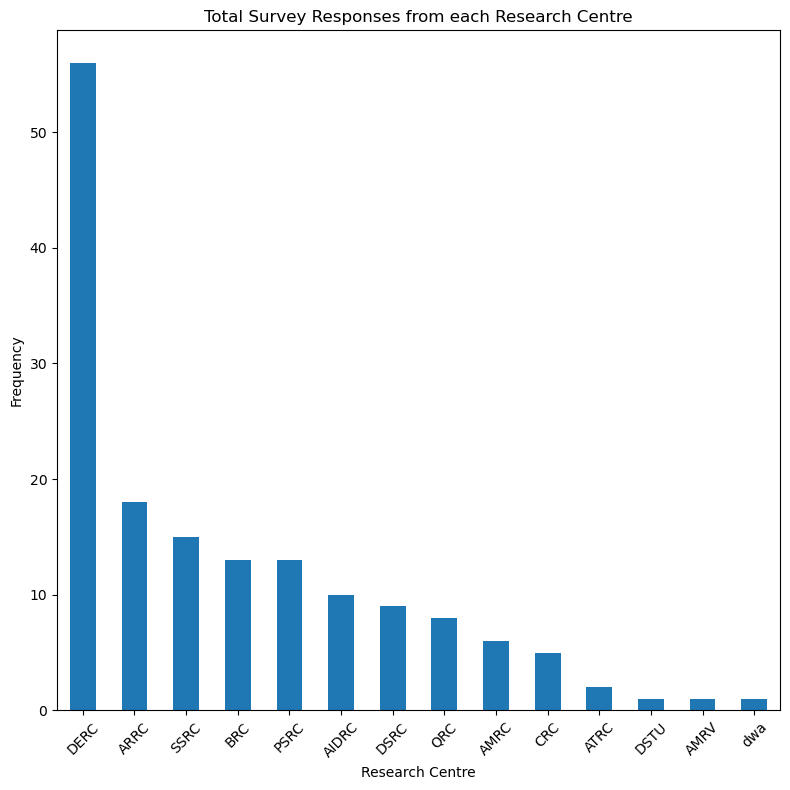

In [10]:
#Total Surveys by TII research center (from Q: Which TII research center are you from?)
question_col_index = 6
answer_col_index = 7

# Filter the data to only include rows where the question matches your question of interest
question_of_interest = 'Which TII research center are you from?'
filtered_data = dataset_melted[dataset_melted.iloc[:, question_col_index] == question_of_interest]

# Get unique values from the next column, which contains the answers
TotalResponses_RC = filtered_data.iloc[:, answer_col_index].value_counts()

# Output the unique answers
print(TotalResponses_RC)
# Sum the counts to get the total number of responses
total_responses = TotalResponses_RC.sum()
print(f'\nTotal number of responses: {total_responses}')
plt.figure(figsize=(8,8))  # You can adjust the size of the figure here
TotalResponses_RC.plot(kind='bar')
plt.title('Total Survey Responses from each Research Centre')
plt.xlabel('Research Centre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis to make them more readable
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

In [11]:
# Total unique surveys by research centers
# Drop duplicates based on the unique identifier within each research center group
unique_responses =filtered_data.drop_duplicates(subset=["What is your name?","What is your work email?"])

# Now, count the unique responses for each research center
TotalUniqueResponses_RC = unique_responses.iloc[:, answer_col_index].value_counts()

# Output the counts of unique responses by research center
print(TotalUniqueResponses_RC)
# Sum the counts of to get the total number of unique responses
total_unique_responses =TotalUniqueResponses_RC.sum()
print(f'\nTotal number of unique responses: {total_unique_responses}')

plt.figure(figsize=(8,8))  # You can adjust the size of the figure here
TotalResponses_RC.plot(kind='bar')
plt.title('Total Survey Participants from each Research Centre')
plt.xlabel('Research Centre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis to make them more readable
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()


Response
DERC     52
ARRC     16
SSRC     15
BRC      10
AIDRC    10
PSRC     10
QRC       8
DSRC      7
CRC       5
AMRC      5
DSTU      1
AMRV      1
dwa       1
ATRC      1
Name: count, dtype: int64

Total number of unique responses: 142


In [12]:
# Num of test takers who submitted more than once ( if 2 people with same name, same email, we will keep only the 1st one , check for different start dates)
# Count the occurrences of each name/email combination

name_col = 'What is your name?'  
email_col = 'What is your work email?'  
question_col = 'Question+ Sub Question'
response_col='Response'
startdate_col = 'Start Date'

# Convert 'Start Date' to datetime to ensure correct chronological sorting
dataset_melted['Start Date'] = pd.to_datetime(dataset_melted['Start Date'])

# Define the columns for identifying a unique test taker
# Sort the data by 'What is your work email?' and 'Start Date'
dataset_sorted = dataset_melted.sort_values(by=['What is your work email?', 'Start Date'])

# Group- by 'What is your work email?' and get the first group (earliest 'Start Date')
grouped_data = dataset_sorted.groupby('What is your work email?')


# Initialize an empty DataFrame to store the first complete survey responses
first_survey_responses = pd.DataFrame()
repeat_survey_responses = pd.DataFrame()

# Iterate over each group and select the records from the first survey
for name, group in grouped_data:
    first_survey_date = group['Start Date'].iloc[0]  # Get the first survey date for this group
    first_survey_data = group[group['Start Date'] == first_survey_date]  # Select all records matching the first survey date
    repeat_survey_data = group[group['Start Date'] != first_survey_date] # Select all subsequent records 
    first_survey_responses = pd.concat([first_survey_responses, first_survey_data], ignore_index=True)
    repeat_survey_responses = pd.concat([repeat_survey_responses,repeat_survey_data],ignore_index=True)

# first_survey_responses now contains all the records from each respondent's first survey response
first_survey_responses.to_csv('first_survey_responses.csv', index=False)
repeat_survey_responses.to_csv('repeat_survey_responses.csv',index=False)

print("First survey responses copied to a new DataFrame.")
print("Repeat Survey responses copied to a new DataFrame")


repeat_responders  = repeat_survey_responses['What is your work email?'].nunique()
print("Number of test takers who submitted survey more than once :", repeat_responders)


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\3872113950.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset_melted['Start Date'] = pd.to_datetime(dataset_melted['Start Date'])


First survey responses copied to a new DataFrame.
Repeat Survey responses copied to a new DataFrame
Number of test takers who submitted survey more than once : 16


In [13]:
# What % of users have tried at least 1 generative ai tool? (from Q: Have you tried generative AI applications such as ChatGPT, MidJourney, or Dall-E?)
try:
    question_of_interest = 'Have you tried generative AI applications such as ChatGPT, MidJourney, or Dall-E?'
    # Filter the data to only include rows where the question matches your question of interest
    filtered_data = first_survey_responses[first_survey_responses.iloc[:, question_col_index] == question_of_interest]
    # Get counts of unique answers
    answer_counts = filtered_data.iloc[:, answer_col_index].value_counts()
    # Calculate the percentage of respondents who tried generative AI
    # Assuming the possible answers are 'Yes' and 'No'
    tried_generative_AI = answer_counts.get('Yes', 0)
    not_tried_generative_AI = answer_counts.get('No', 0)
    percent_not_tried_generative_AI = (not_tried_generative_AI / total_responses) * 100
    total_responses = tried_generative_AI + not_tried_generative_AI
    print(f"Number of people who have tried generative AI applications: {tried_generative_AI}")
    print(f"Number of people who have not tried generative AI applications: {not_tried_generative_AI}")
    if total_responses > 0:
            percent_tried_generative_AI = (tried_generative_AI / total_responses) * 100
            print(f"The percentage of survey respondents who have tried generative AI applications is {percent_tried_generative_AI:.2f}%")
            print(f"The percentage of survey respondents who have not tried generative AI applications is {percent_not_tried_generative_AI:.2f}%")   
    else:
            print("No responses to calculate percentage")
except Exception as e:
    print(f"An error occurred: {e}")

Number of people who have tried generative AI applications: 128
Number of people who have not tried generative AI applications: 13
The percentage of survey respondents who have tried generative AI applications is 90.78%
The percentage of survey respondents who have not tried generative AI applications is 8.23%


In [14]:
#What % of users have worked with prompts before? (from Q: Have you written any prompts with an AI tool before?)
try:
    question_of_interest = 'Have you written any prompts with an AI tool before?'
    # Filter the data to only include rows where the question matches your question of interest
    filtered_data = first_survey_responses[first_survey_responses.iloc[:, question_col_index] == question_of_interest]
    # Get counts of unique answers
    answer_counts = filtered_data.iloc[:, answer_col_index].value_counts()
    # Calculate the percentage of respondents who tried generative AI
     # Assuming the possible answers are 'Yes' and 'No'
    worked_with_prompts = answer_counts.get('Yes', 0)
    not_worked_with_prompts = answer_counts.get('No', 0)
    total_prompt_responses = worked_with_prompts+not_worked_with_prompts

    if total_prompt_responses > 0:
            percent_worked_with_prompts = (worked_with_prompts / total_prompt_responses) * 100
            print(f"The percentage of survey respondents who have worked with prompts is {percent_worked_with_prompts:.2f}%")
    else:
            print("No responses to calculate percentage")
except Exception as e:
    print(f"An error occurred: {e}")

The percentage of survey respondents who have worked with prompts is 66.40%


In [15]:
# AI tools users have worked with before
try:
    question_of_interest = 'Can you list some AI tools that you have worked with?'
    filtered_data = first_survey_responses[first_survey_responses.iloc[:, question_col_index] == question_of_interest]
    # Extract the answers and split by common delimiters (like commas) if necessary
    ai_tools_list = []
    for answer in filtered_data['Response']:
    # Ensure the answer is a string before splitting
         if isinstance(answer, float) and math.isnan(answer):
            continue  # Skip over NaN values
         tools = [tool.strip() for tool in str(answer).split(',')]  # Convert to string and split
         ai_tools_list.extend(tools)  # Add the tools from this answer to the main listfor answer in filtered_data[answer_col_name]:
   

#   Optionally, remove duplicates by converting the list to a set and back to a list
    unique_ai_tools_list = list(set(ai_tools_list))
    print(unique_ai_tools_list)

except Exception as e:
  print(f"An error occurred:{e}")

# List of words
words = unique_ai_tools_list

# Join the list of words into a single string
text = ' '.join(words)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = None,
                      min_font_size = 10).generate(text)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



['', 'Scikit-learn', 'Chatgpt. Dall-E. Consensus.', 'ChatPDF', 'In general', 'Llama', 'ChatGPT 3-4', 'FLAN', 'python', 'Keras Tensorflow library for Python', 'Grammer', 'keras', 'Generative Agents', 'Midjourney', 'FalconLLM', 'Falcon LLM', 'DALL-E 2  ChatGPT', 'Keras', 'bing conversation', 'I\'ve worked with and prefer the "host it yourself" options like AUTOMATIC1111 (Stable Diffusion) and Oobabooga Text UI (with Falcon', 'elmo representations using lstm', 'GPT-3.5-turbo API', 'pandas', 'pdf.ai', 'Dall-e', 'Canva', 'DALLE', 'both)', 'Chatgpt v3.5', 'ChatGPT and Dall-E', 'Tensorflow', '-', 'Fathom', 'OpenAI', 'Noor LLM', 'Photoshop Ai', 'regression models in python', 'TensorRT', 'transformers (encoder only', 'Chat GPT', 'Runway', 'AutoGPT', 'and different open-source NLP libraries', 'AgentGPT', 'DallE 2', 'capcut.ai  chatgpt', '.....', 'I have never used AI tools yet', 'MidJourney', 'cnn', 'Chat-GPT', 'Generative Voice AI', 'Merlin', '#NAME?', 'CharGPT', 'I have just tried using ChatGP

In [16]:
# How do you think AI tools such as ChatGPT can help with your job? 
try:
    question_of_interest = 'How do you think AI tools such as ChatGPT can help with your job?'
    filtered_data = first_survey_responses[first_survey_responses.iloc[:, question_col_index] == question_of_interest]
    # Aggregate all the answers into a single string
    all_responses = ' '.join(filtered_data.iloc[:, answer_col_index].dropna())

    # Generate the word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses)

    # Display the generated word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
except Exception as e:
  print(f"An error occurred:{e}")



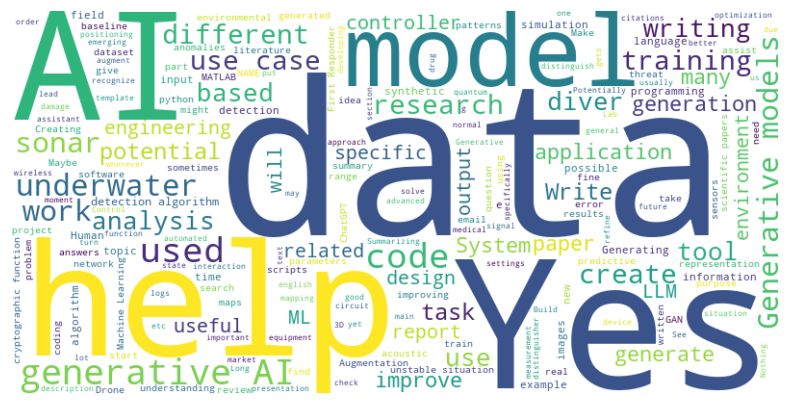

In [17]:
# Generative AI use cases in your work (this can be done manually)
# Not summarized by RC

try:
    question_of_interest = 'Can you think of any potential generative AI use cases in your work?'
    filtered_data = first_survey_responses[first_survey_responses.iloc[:, question_col_index] == question_of_interest]
    # Aggregate all the answers into a single string
    all_cases = ' '.join(filtered_data.iloc[:, answer_col_index].dropna())

    # Generate the word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cases)

    # Display the generated word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
except Exception as e:
  print(f"An error occurred:{e}")



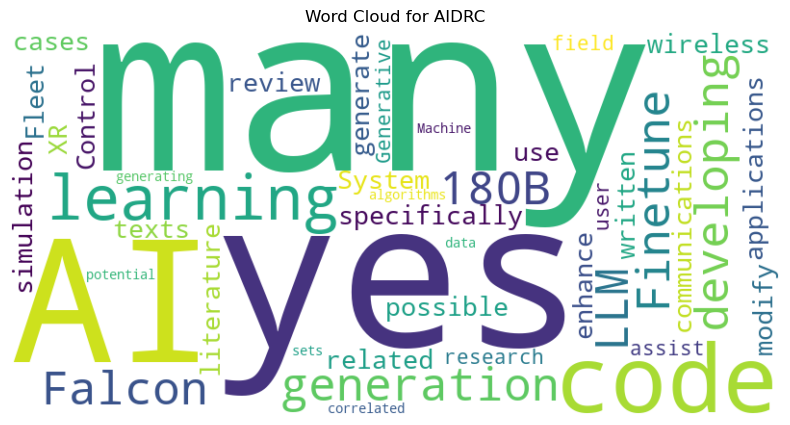

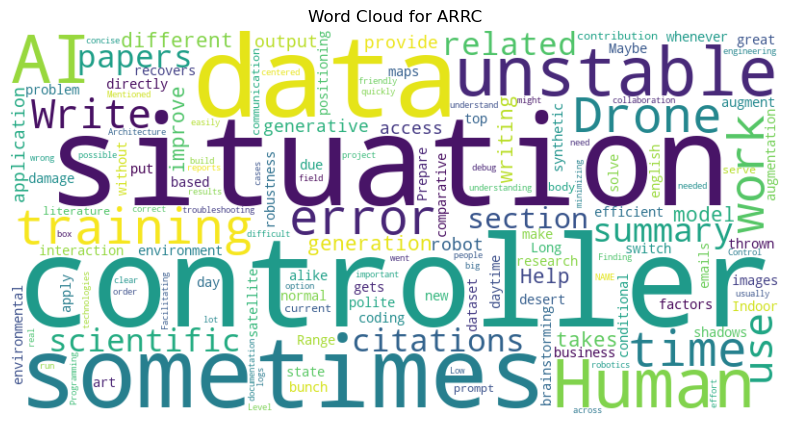

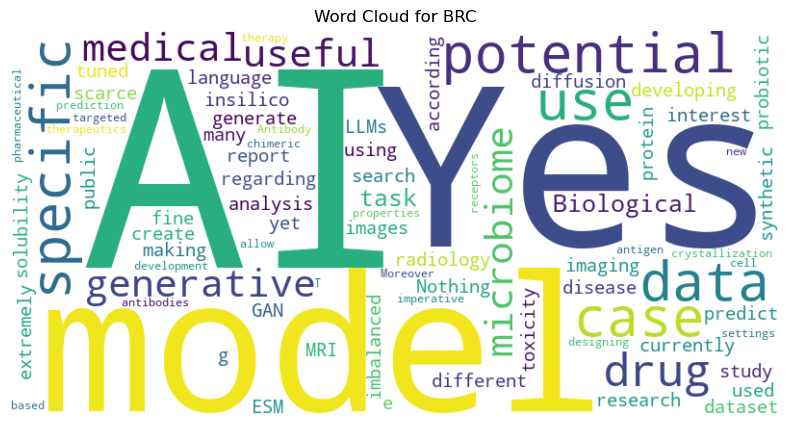

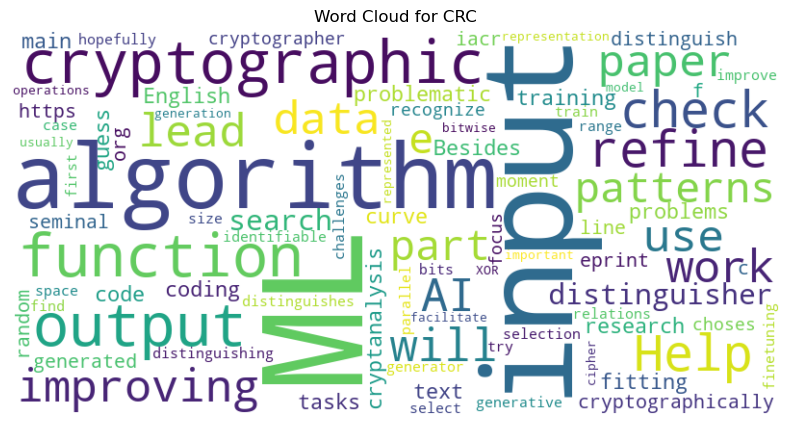

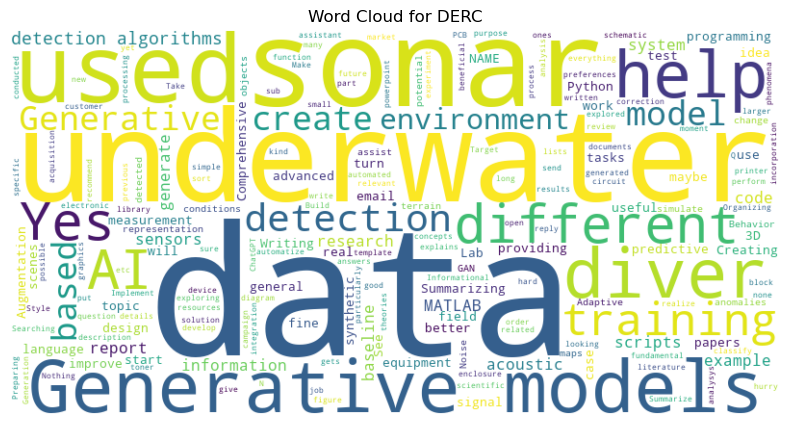

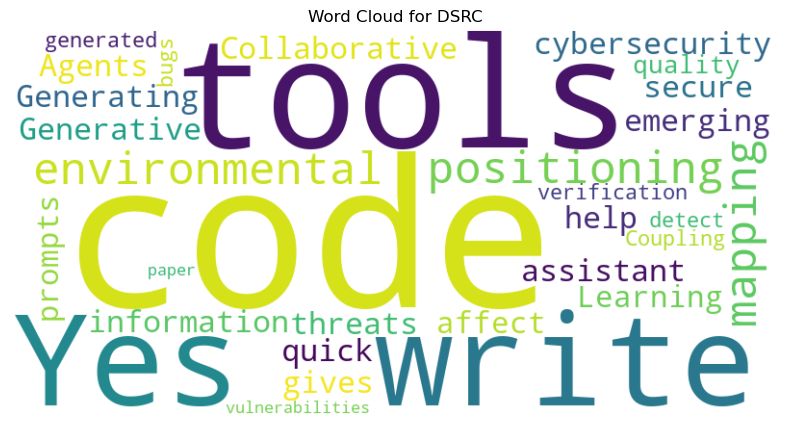

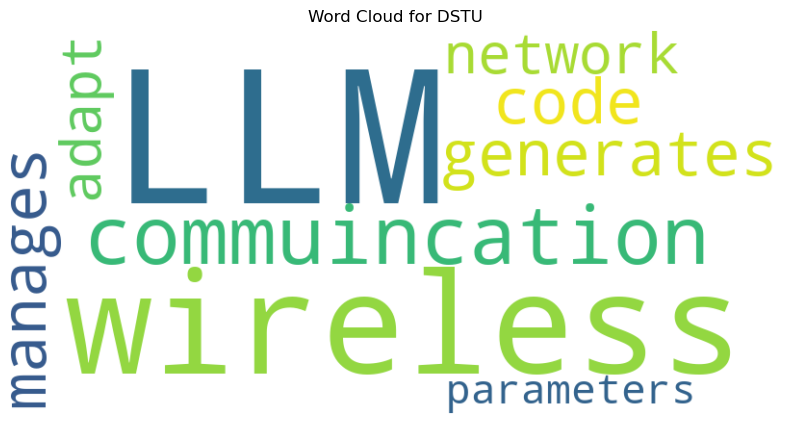

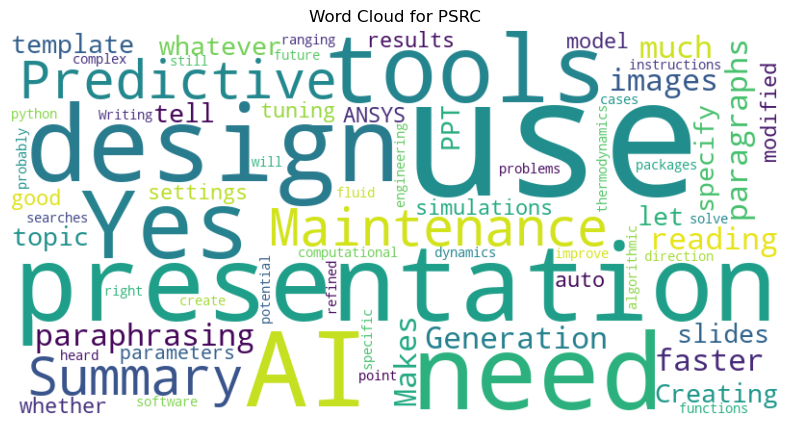

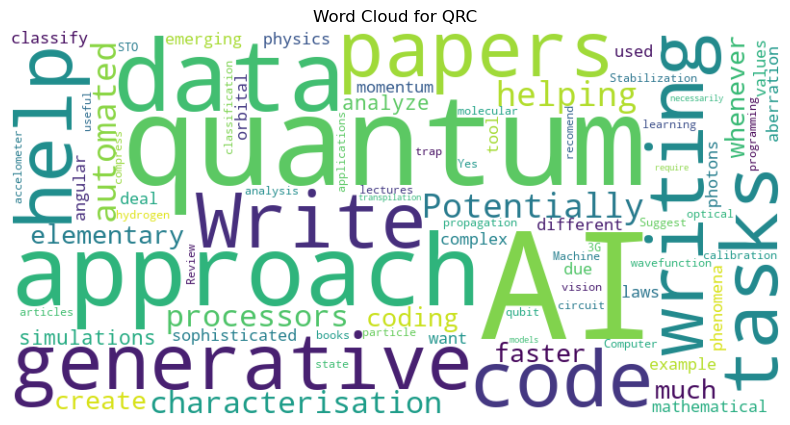

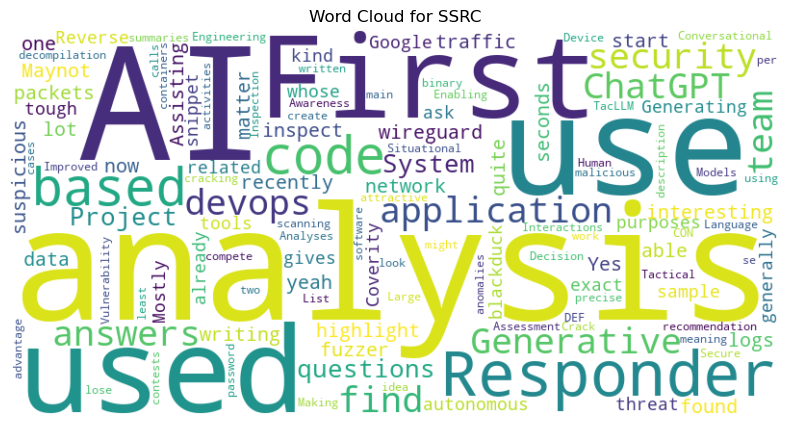

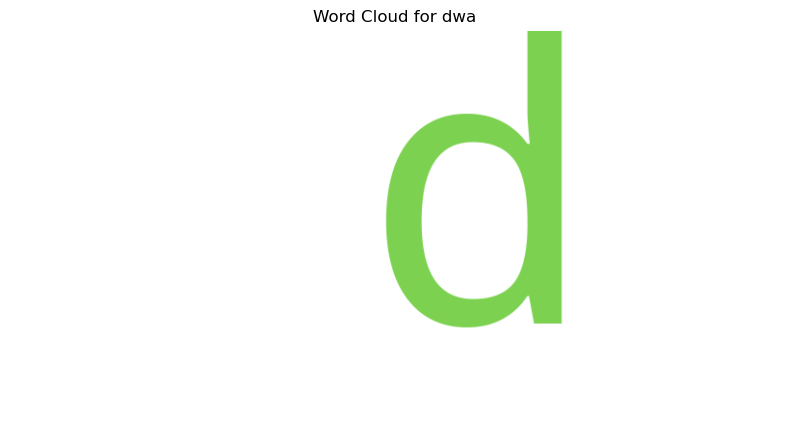

In [18]:
# Generative AI use cases in your work (this can be done manually)
# Summarize this by RC
#'first_survey_responses' is a pandas DataFrame containing all survey responses
try:
    # Define the question of interest
    question_of_interest = 'Can you think of any potential generative AI use cases in your work?'

    # Columns for unique identifiers
    name_col = 'What is your name?'
    email_col = 'What is your work email?'

    # Create a composite identifier in the main DataFrame
    first_survey_responses['composite_id'] = first_survey_responses[name_col] + '_' + first_survey_responses[email_col]

    # Extract research center information into a separate DataFrame
    research_center_question = 'Which TII research center are you from?'
    research_centers = first_survey_responses[first_survey_responses['Question+ Sub Question'] == research_center_question]
    research_centers = research_centers[[name_col, email_col, 'Response']].rename(columns={'Response': 'research_center'})
    
    # Create a composite identifier in the research centers DataFrame
    research_centers['composite_id'] = research_centers[name_col] + '_' + research_centers[email_col]

    # Merge the research center information back into the main DataFrame using the composite identifier
    merged_data = pd.merge(first_survey_responses, research_centers[['composite_id', 'research_center']], on='composite_id')

    # Filter responses based on the question of interest
    filtered_data = merged_data[merged_data['Question+ Sub Question'] == question_of_interest]

    # Group by research center
    grouped_data = filtered_data.groupby('research_center')

    for research_center, group in grouped_data:
        # Aggregate all the answers into a single string
        all_cases = ' '.join(group['Response'].dropna())

        # Generate the word cloud image
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cases)

        # Display the generated word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for {research_center}")
        plt.axis('off')
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


Response
To gain technical experience with machine learning and AI                                             107
To have a solid understanding of the concepts and trends in generative AI                              98
To learn how to use prompting to make myself more efficient at work                                    86
To implement generative AI solutions in the lab or production environment                              85
To learn how to fine-tune and apply AI models for my business domains                                  72
To learn how to build NLP, LLM, or Computer Vision models                                              69
To be self-sufficient with no-code AI tools for business                                               44
Gain some exposure and jargon in the generative AI field                                               44
d                                                                                                       1
Specifics about TII's Falcon class: u

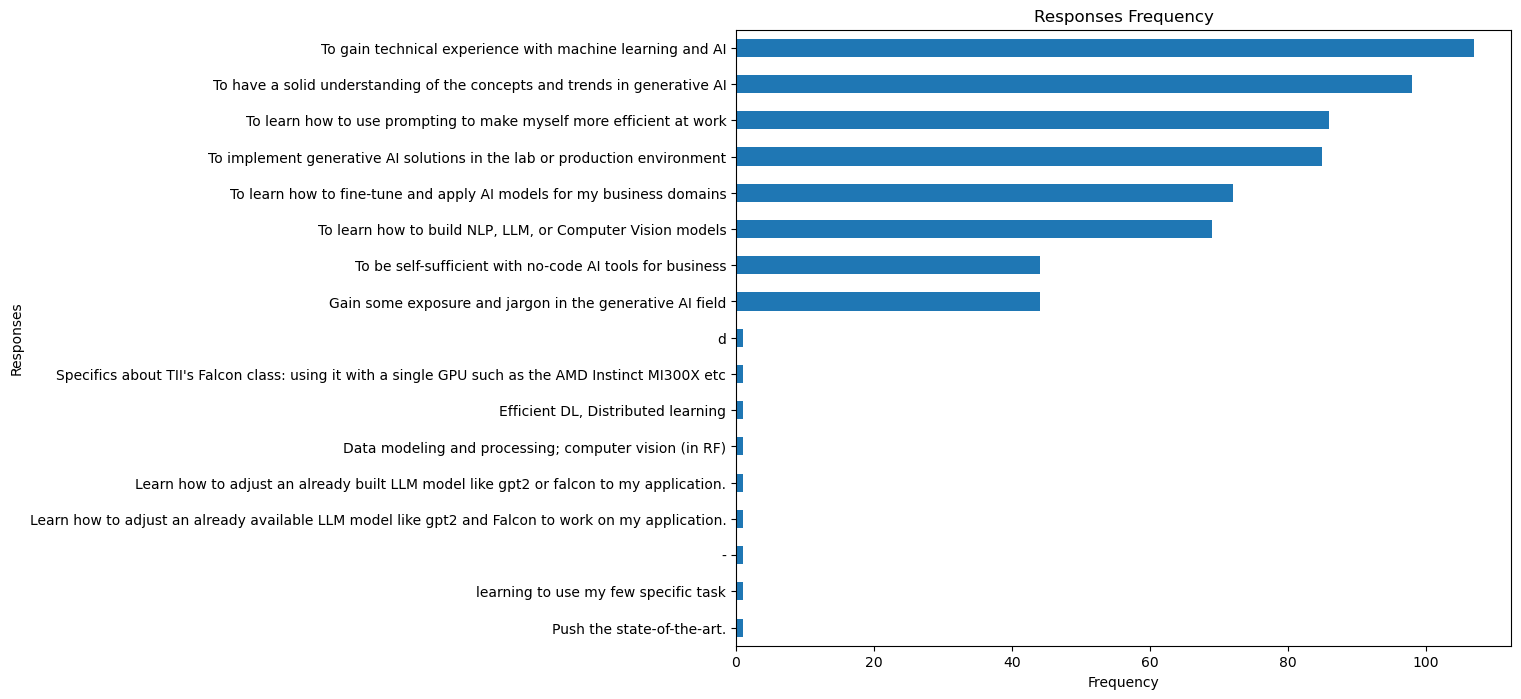

In [19]:
try:
    question_of_interest = 'What do you want to get the most out of the generative AI training courses?'
    # Filter the data to only include rows where the question matches your question of interest
    filtered_data = first_survey_responses[first_survey_responses.iloc[:, question_col_index].str.contains(question_of_interest, na=False)]
    

    # Get responses from the next column
    Responses = filtered_data.iloc[:, answer_col_index].value_counts()

# Output the unique answers
    print(Responses)
     # Plotting the responses in a horizontal bar chart
    plt.figure(figsize=(10, 8))  # Set the figure size (width, height) in inches
    Responses.plot(kind='barh')  # 'barh' creates a horizontal bar chart
    
    plt.xlabel('Frequency')
    plt.ylabel('Responses')
    plt.title('Responses Frequency')
    plt.gca().invert_yaxis()  # Invert the y-axis to show the highest frequency at the top
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")



In [20]:
# Survey Completion:
# What % of users know Python and rated themselves higher than 5? → moving on to the python questions
# Filter rows where the respondent has experience with Python

python_experience_question = "Do you have experience with Python programming?"
python_experienced = first_survey_responses[
    (first_survey_responses['Question+ Sub Question'] == python_experience_question) & 
    (first_survey_responses['Response'] == 'Yes')
]

# Extract names and email addresses of these respondents
python_user_info = python_experienced[['What is your name?', 'What is your work email?']]

# The question of interest
rating_question = "On a scale of 1 to 10, how would you rate your python skills?"

# Filter the DataFrame for the rating question
python_rating_df = first_survey_responses[first_survey_responses.iloc[:, question_col_index].str.contains(rating_question, na=False)]

# Merge on the actual column names used in python_user_info
matched_df = python_rating_df.merge(
    python_user_info, 
    on=['What is your name?', 'What is your work email?']
)

# Filter only those who have rated themselves 5 and above
rated_5_and_above_df = matched_df[matched_df['Response'].astype(int) >= 5]
# Filter those who rated themselves below 5
rated_below_5_df = matched_df[matched_df['Response'].astype(int) < 5]

# Output the result
number_of_respondents_5_and_above = len(rated_5_and_above_df)
number_of_respondents_below_5 = len(rated_below_5_df)
sum_respondents = number_of_respondents_5_and_above + number_of_respondents_below_5
perc_above = (number_of_respondents_5_and_above  / sum_respondents) * 100
perc_below = (number_of_respondents_below_5 /sum_respondents)* 100

# Drop duplicate rows based on 'What is your name?' and 'What is your work email?' columns in the original dataset
unique_respondents_df = first_survey_responses.drop_duplicates(subset=['What is your name?', 'What is your work email?'])
total_unique_respondents = len(unique_respondents_df)

# Calculate the percentages
percent_5_and_above = (number_of_respondents_5_and_above / total_unique_respondents) * 100
percent_below_5 = (number_of_respondents_below_5 / total_unique_respondents) * 100


print(f"A total of {number_of_respondents_5_and_above} ({perc_above:.2f}% ) respondents rated their Python skills 5 and above ")
print(f"A total of {number_of_respondents_below_5} ({perc_below:.2f}% ) respondents rated their Python skills below 5")

print(f"Out of the overall survey participants , {percent_5_and_above:.2f}% of respondents who rated their Python skills 5 and abov ")
print(f"Out of the overall survey participants , {percent_below_5:.2f}%  of respondents who rated their Python skills below 5")




A total of 78 (68.42% ) respondents rated their Python skills 5 and above 
A total of 36 (31.58% ) respondents rated their Python skills below 5
Out of the overall survey participants , 55.32% of respondents who rated their Python skills 5 and abov 
Out of the overall survey participants , 25.53%  of respondents who rated their Python skills below 5


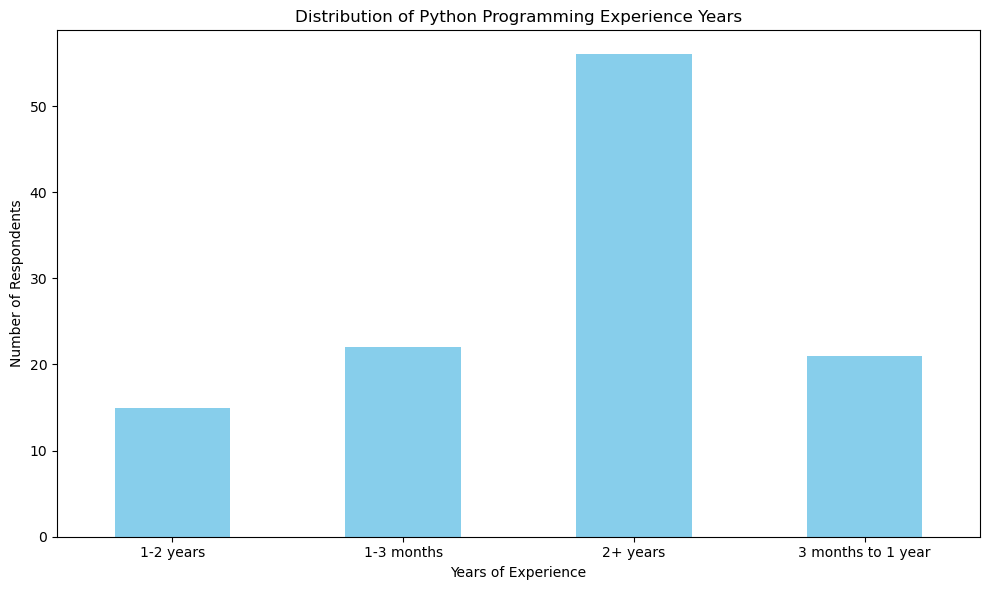

In [21]:
# For those who know python (answer yes), what are their years of experiences with python? (from Q: How many years of python programming experience do you have?)
experience_question = "How many years of python programming experience do you have?"

# Filter the DataFrame for the rating question
python_experience_df = first_survey_responses[first_survey_responses.iloc[:, question_col_index].str.contains(experience_question, na=False)]
 
python_experience_df

# Merge the filtered rating DataFrame with the info DataFrame
# Ensure that 'What is your name?' and 'What is your work email?' match the actual column names in your dataset
matched_df = python_experience_df.merge(
    python_user_info, 
    left_on=['What is your name?', 'What is your work email?'], 
    right_on=['What is your name?', 'What is your work email?']
)
matched_df
python_experience_counts = matched_df['Response'].value_counts()
# Sort the index if it's not already in order, assuming the index is numeric (years of experience)
python_experience_counts = python_experience_counts.sort_index()

# Plotting the results in a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
python_experience_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Distribution of Python Programming Experience Years')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)  # Rotates the labels on the x-axis to make them more readable

# Show the plot
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

In [22]:
# For those who did the python related questions, what % completed the coding challenges?
keywords_to_filter = [
    "Select the all correct way to remove the key ",
    "What is the output of the following nested loop",
    "Guess the correct output of the following code",
    "A palindrome is a word, phrase, number",
    "In this task, we are attempting to rank the highest salaries ",
    "Here's an Example for sales made by company X for two products. ",
    "In the next example, there is a 'Shape' superclass ",
    "rate your machine learning experience",
    "Hello! We are super excited to have you join the program to learn about generative AI amongst other things!"
]
 # Adjust based on your dataset column name
started_python_assessment_data = first_survey_responses[first_survey_responses['Question+ Sub Question'].apply(lambda x: any(keyword in x for keyword in keywords_to_filter))]
# started_python_assessment_data
started_python_assessment_data.to_csv('started_python_assessment_data.csv',index= False)
file_name = "started_python_assessment_data.csv"
print(f"Python assessment data copied to {file_name}")


Python assessment data copied to started_python_assessment_data.csv


In [23]:

# Combine 'What is your name?' and 'What is your work email?' to create a unique identifier for each respondent
# started_python_assessment_data['User Identifier'] = started_python_assessment_data['What is your name?'] + ' ' + started_python_assessment_data['What is your work email?']
started_python_assessment_data.loc[:, 'User Identifier'] = started_python_assessment_data['What is your name?'] + ' ' + started_python_assessment_data['What is your work email?']

# Create a new column 'Options' by splitting 'Question+ Sub Question' based on the delimiter '||'
#started_python_assessment_data['Question'] = started_python_assessment_data['Question+ Sub Question'].str.split('||').apply(lambda x: x[0] if len(x) > 0 else '')
#started_python_assessment_data['Options'] = started_python_assessment_data['Question+ Sub Question'].str.split('||').apply(lambda x: x[1] if len(x) > 1 else x[0] if len(x) > 0 else '')

started_python_assessment_data.loc[:,'Question'] = started_python_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[0] if x else '')
started_python_assessment_data.loc[:,'Options'] = started_python_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[-1] if x else '')
started_python_assessment_data.to_csv("started_python_assessment_data.csv")

# Group by user and question, then check for non-blank responses
user_question_completion = started_python_assessment_data.groupby(['User Identifier', 'Question'])['Response'].apply(lambda x: x.notna().any())
user_question_completion.to_csv("user_question_completion.csv")
# Unstack to get a DataFrame where each row represents a user and each column represents a question
# True in a cell means the user has provided at least one response to that question
user_completion_matrix = user_question_completion.unstack()
user_completion_matrix.to_csv('user_completion_matrix.csv')

# Check if each user has provided at least one response to all questions
user_completed_all_questions = user_completion_matrix.all(axis=1)

# Count how many users completed all questions (provided at least one response to each question)
completed_python_assessment_count = user_completed_all_questions.sum()
started_python_assessment_count = started_python_assessment_data['User Identifier'].nunique()

percentage_completed_coding_challenges = (completed_python_assessment_count / started_python_assessment_count) * 100
# print(f'Started Python assessment users count: { started_python_assessment_count}')
print(f'Completed Python assessment users count: {completed_python_assessment_count}')
print(f'Percentage of users who completed the Python assessment: {percentage_completed_coding_challenges:.2f}%')




C:\Users\subin\AppData\Local\Temp\ipykernel_17764\4250589492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_python_assessment_data.loc[:, 'User Identifier'] = started_python_assessment_data['What is your name?'] + ' ' + started_python_assessment_data['What is your work email?']
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\4250589492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_python_assessment_data.loc[:,'Question'] = started_python_assessment_data['Question+ Sub Question']

Completed Python assessment users count: 51
Percentage of users who completed the Python assessment: 36.17%


In [24]:
started_python_assessment_data

Respondent ID  Collector ID          Start Date  \
20      1.144280e+11   427913904.0 2023-10-04 07:54:04   
21      1.144280e+11   427913904.0 2023-10-04 07:54:04   
22      1.144280e+11   427913904.0 2023-10-04 07:54:04   
23      1.144280e+11   427913904.0 2023-10-04 07:54:04   
24      1.144280e+11   427913904.0 2023-10-04 07:54:04   
...              ...           ...                 ...   
28036   1.144280e+11   427913904.0 2023-10-03 19:05:08   
28037   1.144280e+11   427913904.0 2023-10-03 19:05:08   
28038   1.144280e+11   427913904.0 2023-10-03 19:05:08   
28039   1.144280e+11   427913904.0 2023-10-03 19:05:08   
28040   1.144280e+11   427913904.0 2023-10-03 19:05:08   

                     End Date     What is your name?  \
20     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
21     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
22     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
23     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
24     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
...                       ...                    ...   
28036  10/03/2023 07:09:53 PM          Zubair Akhter   
28037  10/03/2023 07:09:53 PM          Zubair Akhter   
28038  10/03/2023 07:09:53 PM          Zubair Akhter   
28039  10/03/2023 07:09:53 PM          Zubair Akhter   
28040  10/03/2023 07:09:53 PM          Zubair Akhter   

           What is your work email?  \
20     Abdelrahman.Almahmoud@tii.ae   
21     Abdelrahman.Almahmoud@tii.ae   
22     Abdelrahman.Almahmoud@tii.ae   
23     Abdelrahman.Almahmoud@tii.ae   
24     Abdelrahman.Almahmoud@tii.ae   
...                             ...   
28036          zubair.akhter@tii.ae   
28037          zubair.akhter@tii.ae   
28038          zubair.akhter@tii.ae   
28039          zubair.akhter@tii.ae   
28040          zubair.akhter@tii.ae   

                                  Question+ Sub Question  \
20     Select the all correct way to remove the key "...   
21     Select the all correct way to remove the key "...   
22     Select the all correct way to remove the key "...   
23     Select the all correct way to remove the key "...   
24     What is the output of the following nested loo...   
...                                                  ...   
28036  Here's an Example for sales made by company X ...   
28037  Here's an Example for sales made by company X ...   
28038  In the next example, there is a 'Shape' superc...   
28039  On a scale of 1 to 10, how would you rate your...   
28040  Hands-on Coding Challenge---------------------...   

                                  Response  \
20                                     NaN   
21                    student.pop("marks")   
22                                     NaN   
23                                     NaN   
24     10 Chair 10 Table 20 Chair 20 Table   
...                                    ...   
28036                                  NaN   
28037                                  NaN   
28038                                  NaN   
28039                                  NaN   
28040                                  NaN   

                                            composite_id  \
20     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
21     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
22     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
23     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
24     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
...                                                  ...   
28036                 Zubair Akhter_zubair.akhter@tii.ae   
28037                 Zubair Akhter_zubair.akhter@tii.ae   
28038                 Zubair Akhter_zubair.akhter@tii.ae   
28039                 Zubair Akhter_zubair.akhter@tii.ae   
28040                 Zubair Akhter_zubair.akhter@tii.ae   

                                         User Identifier  \
20     Abdelrahman AlMahmoud Abdelrahman.Almahmoud@ti...   
21     Abdelrahman AlMahmoud Abdelrahman.Almahmoud@ti

In [25]:
# What % of users don't know ML or rated themselves higher than 5? (from Q: On a scale of 1 to 10, how would you rate your machine learning experience?)
rating_question = "On a scale of 1 to 10, how would you rate your machine learning experience?"

# Filter the DataFrame for the rating question
ml_rating_df = first_survey_responses[first_survey_responses.iloc[:, question_col_index].str.contains(rating_question, na=False)]
# Convert the 'Response' column to numeric type, errors='coerce' will set invalid parsing to NaN
ml_rating_df['Response'] = pd.to_numeric(ml_rating_df['Response'], errors='coerce')
know_ml_count = ml_rating_df[ml_rating_df['Response'] >= 5].shape[0] 
doesnotknow_ml_count = ml_rating_df[ml_rating_df['Response']< 5].shape[0] 

first_survey_responses['unique_identifier'] = first_survey_responses['What is your name?'] + first_survey_responses['What is your work email?']
# Count the unique identifiers
unique_respondents_count = first_survey_responses['unique_identifier'].nunique()
# Total number of respondents who answered the machine learning experience question
total_ml_respondents = know_ml_count + doesnotknow_ml_count
know_ml_perc = know_ml_count / total_ml_respondents *100
doesnot_ml_perc = doesnotknow_ml_count / total_ml_respondents * 100

# Calculate percentages
percentage_know_ml = (know_ml_count / unique_respondents_count) * 100
percentage_doesnotknow_ml = (doesnotknow_ml_count / unique_respondents_count) * 100

# Display the results
# print(f'Total number of people who took the AI assessment survey: {unique_respondents_count}')
print(f'Total number of people who answered the ML rating question: {total_ml_respondents}')
print(f'Total number of people who know ML: {know_ml_count} ({know_ml_perc:.2f}%)')
print(f'Total number of people who do not know ML: {doesnotknow_ml_count} ({doesnot_ml_perc:.2f}%)')
print(f'Out of all the survey participants {percentage_know_ml:.2f}% of people know ML')
print(f'Out of all the survey participants {percentage_doesnotknow_ml:.2f}% of people do not know ML ')



Total number of people who answered the ML rating question: 58
Total number of people who know ML: 41 (70.69%)
Total number of people who do not know ML: 17 (29.31%)
Out of all the survey participants 29.08% of people know ML
Out of all the survey participants 12.06% of people do not know ML 


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\3873293582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_rating_df['Response'] = pd.to_numeric(ml_rating_df['Response'], errors='coerce')


In [26]:
# For those who did the ML related questions, what % completed the coding challenges?
keywords_to_filter_ml = [
    "Given g(x, y), find its partial derivative with respect to x ",
    "There are several tree splitting criterion for classification problems in a decision tree. Choose the correct splitting criterion",
    "study factors affecting the decision of a frog to jump (or not) (label), a data scientist collects data pertaining to several independent binary co-variates (features) from a Brazilian rain-forest",
    "Which of the following is a common loss function for classification problems?",
    "Which of the following evaluation metrics is/are commonly used for classification problems",
    "You trained a model that gives ",
    "What following approaches would you apply to improve your ML model performance",
    "What is the difference between bagging and boosting",
    "In PyTorch when we build a neural networks model, we sometimes use zero_grad() function. Choose the answers that are correct",
    "Choose all that applies regarding the nn.Squential and nn.Module APIs in PyTorch",
    "During the training of an ANN, a sigmoid layer applies the sigmoid function to every element in the forward pass",
    "This is a technical test to assess your hands-on experience with building ML models."
]
 # Adjust based on your dataset column name
started_ml_assessment_data = first_survey_responses[first_survey_responses['Question+ Sub Question'].apply(lambda x: any(keyword in x for keyword in keywords_to_filter_ml))]
# started_python_assessment_data
started_ml_assessment_data.to_csv('started_ml_assessment_data.csv',index= False)

# Combine 'What is your name?' and 'What is your work email?' to create a unique identifier for each respondent
# started_python_assessment_data['User Identifier'] = started_python_assessment_data['What is your name?'] + ' ' + started_python_assessment_data['What is your work email?']
started_ml_assessment_data.loc[:, 'User Identifier'] = started_ml_assessment_data['What is your name?'] + ' ' + started_ml_assessment_data['What is your work email?']

# Create a new column 'Options' by splitting 'Question+ Sub Question' based on the delimiter '_'
started_ml_assessment_data.loc[:,'Question'] = started_ml_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[0] if x else '')
started_ml_assessment_data.loc[:,'Options'] = started_ml_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[-1] if x else '')
started_ml_assessment_data.to_csv("started_ml_assessment_data.csv")

# Group by user and question, then check for non-blank responses
user_question_completion_ml = started_ml_assessment_data.groupby(['User Identifier', 'Question'])['Response'].apply(lambda x: x.notna().any())
user_question_completion.to_csv("user_question_completion_ml.csv")
# Unstack to get a DataFrame where each row represents a user and each column represents a question
# True in a cell means the user has provided at least one response to that question
user_completion_matrix_ml = user_question_completion_ml.unstack()
user_completion_matrix_ml.to_csv('user_completion_matrix_ml.csv')

# Check if each user has provided at least one response to all questions
user_completed_all_questions_ml = user_completion_matrix_ml.all(axis=1)

# Count how many users completed all questions (provided at least one response to each question)
completed_ml_assessment_count = user_completed_all_questions_ml.sum()
started_ml_assessment_count = started_ml_assessment_data['User Identifier'].nunique()

percentage_completed_ml_coding_challenges = (completed_ml_assessment_count / started_ml_assessment_count) * 100
#print(f'Started ML assessment users count: { started_ml_assessment_count}')
print(f'Completed ML assessment users count: {completed_ml_assessment_count}')
print(f'Percentage of users who completed the ML assessment: {percentage_completed_ml_coding_challenges:.2f}%')



C:\Users\subin\AppData\Local\Temp\ipykernel_17764\1362175691.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_ml_assessment_data.loc[:, 'User Identifier'] = started_ml_assessment_data['What is your name?'] + ' ' + started_ml_assessment_data['What is your work email?']
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\1362175691.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_ml_assessment_data.loc[:,'Question'] = started_ml_assessment_data['Question+ Sub Question'].str.split('~|~').

Completed ML assessment users count: 29
Percentage of users who completed the ML assessment: 20.57%


In [27]:
# What % of users don't know Data Augmentation and preprocessing or rated themsleves higher than 5? (from Q: Do you know data augmentation and processing?)
# The question of interest
data_augmentation_question = "On a scale of 1 to 10, how would you rate your experience with data management and processing"
# Filter the DataFrame for the rating question
data_augmentation_df = first_survey_responses[first_survey_responses.iloc[:, question_col_index].str.contains(data_augmentation_question, na=False)]
data_augmentation_df['Response'] = pd.to_numeric(data_augmentation_df['Response'], errors='coerce')
data_augmentation_df.to_csv('data_augmentation_df.csv',index=False)
# Check if the data_augmentation_df is empty
if data_augmentation_df.empty:
    print("No responses found for the data augmentation question.")
else:
   # Count the number of responses 5 and above
    da_ratings_5_and_above_count = data_augmentation_df['Response'].ge(5).sum()

# Count the number of responses below 5
    da_ratings_below_5_count = data_augmentation_df['Response'].lt(5).sum()

# Calculate the total number of responses considered for the calculation
    da_total_responses = da_ratings_5_and_above_count + da_ratings_below_5_count
    perc_da_above = da_ratings_5_and_above_count / da_total_responses
    perc_da_below = da_ratings_below_5_count / da_total_responses

# Calculate the percentages
if total_responses > 0:
    da_percentage_5_and_above = (da_ratings_5_and_above_count / unique_respondents_count) * 100
    da_percentage_below_5 = (da_ratings_below_5_count / unique_respondents_count) * 100
    print(f'Number of people who rated their data augmentation skills 5 and above: {da_ratings_5_and_above_count} ({perc_da_above:.2f}%)')
    print(f'Number of people who rated their data augmentation skills below 5: {da_ratings_below_5_count} ({perc_da_below:.2f}%)')
    print(f'Percentage of people who rated their data augmentation skills 5 and above: {da_percentage_5_and_above:.2f}%')
    print(f'Percentage of people who rated their data augmentation skills below 5: {da_percentage_below_5:.2f}%')
else:
    print("No valid responses to calculate percentages.")

Number of people who rated their data augmentation skills 5 and above: 12 (0.48%)
Number of people who rated their data augmentation skills below 5: 13 (0.52%)
Percentage of people who rated their data augmentation skills 5 and above: 8.51%
Percentage of people who rated their data augmentation skills below 5: 9.22%


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\3342425572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_augmentation_df['Response'] = pd.to_numeric(data_augmentation_df['Response'], errors='coerce')


In [28]:
# What % of users don't know NLP or rated themselves higher than 5? (from Q: Do you know NLP?)
# The question of interest
nlp_question = "On a scale of 1 to 10, how would you rate your experience with NLP?"

# Filter the DataFrame for the NLP rating question
nlp_df = first_survey_responses[first_survey_responses.iloc[:, question_col_index].str.contains(nlp_question, na=False)]

# Convert 'Response' column to numeric
nlp_df['Response'] = pd.to_numeric(nlp_df['Response'], errors='coerce')
nlp_df.to_csv("nlp_df.csv")
# Check if the nlp_df is empty
if nlp_df.empty:
    print("No responses found for the NLP question.")
else:
    # Count the number of responses 5 and above
    nlp_ratings_5_and_above_count = nlp_df['Response'].ge(5).sum()

    # Count the number of responses below 5 (considering these as not knowing NLP)
    nlp_ratings_below_5_count = nlp_df['Response'].lt(5).sum()

   
    # Calculate the percentages
    
    nlp_percentage_5_and_above = (nlp_ratings_5_and_above_count / unique_respondents_count) * 100
    nlp_percentage_below_5 = (nlp_ratings_below_5_count / unique_respondents_count) * 100

    print(f'Number of people who rated their NLP skills 5 and above: {nlp_ratings_5_and_above_count}')
    print(f'Number of people who rated their NLP skills below 5: {nlp_ratings_below_5_count}')
    print(f'Percentage of people who rated their NLP skills 5 and above: {nlp_percentage_5_and_above:.2f}%')
    print(f'Percentage of people who don\'t know NLP (rated below 5): {nlp_percentage_below_5:.2f}%')



Number of people who rated their NLP skills 5 and above: 4
Number of people who rated their NLP skills below 5: 19
Percentage of people who rated their NLP skills 5 and above: 2.84%
Percentage of people who don't know NLP (rated below 5): 13.48%


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\4019437173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_df['Response'] = pd.to_numeric(nlp_df['Response'], errors='coerce')


In [29]:
# What % of users don't know NLP or rated themselves higher than 5? (from Q: Do you know NLP?)
# The question of interest
nlp_question = "On a scale of 1 to 10, how would you rate your experience with NLP?"

# Filter the DataFrame for the NLP rating question
nlp_df = first_survey_responses[first_survey_responses.iloc[:, question_col_index].str.contains(nlp_question, na=False)]

# Convert 'Response' column to numeric
nlp_df['Response'] = pd.to_numeric(nlp_df['Response'], errors='coerce')
nlp_df.to_csv("nlp_df.csv")
# Check if the nlp_df is empty
if nlp_df.empty:
    print("No responses found for the NLP question.")
else:
    # Count the number of responses 5 and above
    nlp_ratings_5_and_above_count = nlp_df['Response'].ge(5).sum()

    # Count the number of responses below 5 (considering these as not knowing NLP)
    nlp_ratings_below_5_count = nlp_df['Response'].lt(5).sum()

   
    # Calculate the percentages
    
    nlp_percentage_5_and_above = (nlp_ratings_5_and_above_count / unique_respondents_count) * 100
    nlp_percentage_below_5 = (nlp_ratings_below_5_count / unique_respondents_count) * 100

    print(f'Number of people who rated their NLP skills 5 and above: {nlp_ratings_5_and_above_count}')
    print(f'Number of people who rated their NLP skills below 5: {nlp_ratings_below_5_count}')
    print(f'Percentage of people who rated their NLP skills 5 and above: {nlp_percentage_5_and_above:.2f}%')
    print(f'Percentage of people who don\'t know NLP (rated below 5): {nlp_percentage_below_5:.2f}%')


Number of people who rated their NLP skills 5 and above: 4
Number of people who rated their NLP skills below 5: 19
Percentage of people who rated their NLP skills 5 and above: 2.84%
Percentage of people who don't know NLP (rated below 5): 13.48%


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\3356793012.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp_df['Response'] = pd.to_numeric(nlp_df['Response'], errors='coerce')


In [30]:
# What % of users don't know CV or rated themselves higher than 5? (from Q: Do you know CV?)
# The question of interest
cv_question = "On a scale of 1 to 10, how would you rate your experience with Computer Vision?"

# Filter the DataFrame for the Computer Vision rating question
cv_df = first_survey_responses[first_survey_responses['Question+ Sub Question'].str.contains(cv_question, na=False)]

# Convert 'Response' column to numeric
cv_df['Response'] = pd.to_numeric(cv_df['Response'], errors='coerce')

# Check if the cv_df is empty
if cv_df.empty:
    print("No responses found for the Computer Vision question.")
else:
    # Count the number of responses 5 and above
    cv_ratings_above_5_count = cv_df['Response'].ge(5).sum()

    # Count the number of responses 5 and below
    cv_ratings_5_and_below_count = cv_df['Response'].lt(5).sum()

    
    # Calculate the percentages
    if unique_respondents_count > 0:
        cv_percentage_above_5 = (cv_ratings_above_5_count / unique_respondents_count) * 100
        cv_percentage_5_and_below = (cv_ratings_5_and_below_count / unique_respondents_count) * 100

        print(f'Number of people who rated their Computer Vision skills above 5: {cv_ratings_above_5_count}')
        print(f'Number of people who rated their Computer Vision skills below 5: {cv_ratings_5_and_below_count}')
        print(f'Percentage of people who rated their Computer Vision skills above 5: {cv_percentage_above_5:.2f}%')
        print(f'Percentage of people who rated their Computer Vision skills below 5: {cv_percentage_5_and_below:.2f}%')
    else:
        print("No valid responses to calculate percentages.")


Number of people who rated their Computer Vision skills above 5: 7
Number of people who rated their Computer Vision skills below 5: 16
Percentage of people who rated their Computer Vision skills above 5: 4.96%
Percentage of people who rated their Computer Vision skills below 5: 11.35%


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\2519033751.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_df['Response'] = pd.to_numeric(cv_df['Response'], errors='coerce')


In [31]:
started_python_assessment_data

Respondent ID  Collector ID          Start Date  \
20      1.144280e+11   427913904.0 2023-10-04 07:54:04   
21      1.144280e+11   427913904.0 2023-10-04 07:54:04   
22      1.144280e+11   427913904.0 2023-10-04 07:54:04   
23      1.144280e+11   427913904.0 2023-10-04 07:54:04   
24      1.144280e+11   427913904.0 2023-10-04 07:54:04   
...              ...           ...                 ...   
28036   1.144280e+11   427913904.0 2023-10-03 19:05:08   
28037   1.144280e+11   427913904.0 2023-10-03 19:05:08   
28038   1.144280e+11   427913904.0 2023-10-03 19:05:08   
28039   1.144280e+11   427913904.0 2023-10-03 19:05:08   
28040   1.144280e+11   427913904.0 2023-10-03 19:05:08   

                     End Date     What is your name?  \
20     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
21     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
22     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
23     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
24     10/04/2023 03:10:31 PM  Abdelrahman AlMahmoud   
...                       ...                    ...   
28036  10/03/2023 07:09:53 PM          Zubair Akhter   
28037  10/03/2023 07:09:53 PM          Zubair Akhter   
28038  10/03/2023 07:09:53 PM          Zubair Akhter   
28039  10/03/2023 07:09:53 PM          Zubair Akhter   
28040  10/03/2023 07:09:53 PM          Zubair Akhter   

           What is your work email?  \
20     Abdelrahman.Almahmoud@tii.ae   
21     Abdelrahman.Almahmoud@tii.ae   
22     Abdelrahman.Almahmoud@tii.ae   
23     Abdelrahman.Almahmoud@tii.ae   
24     Abdelrahman.Almahmoud@tii.ae   
...                             ...   
28036          zubair.akhter@tii.ae   
28037          zubair.akhter@tii.ae   
28038          zubair.akhter@tii.ae   
28039          zubair.akhter@tii.ae   
28040          zubair.akhter@tii.ae   

                                  Question+ Sub Question  \
20     Select the all correct way to remove the key "...   
21     Select the all correct way to remove the key "...   
22     Select the all correct way to remove the key "...   
23     Select the all correct way to remove the key "...   
24     What is the output of the following nested loo...   
...                                                  ...   
28036  Here's an Example for sales made by company X ...   
28037  Here's an Example for sales made by company X ...   
28038  In the next example, there is a 'Shape' superc...   
28039  On a scale of 1 to 10, how would you rate your...   
28040  Hands-on Coding Challenge---------------------...   

                                  Response  \
20                                     NaN   
21                    student.pop("marks")   
22                                     NaN   
23                                     NaN   
24     10 Chair 10 Table 20 Chair 20 Table   
...                                    ...   
28036                                  NaN   
28037                                  NaN   
28038                                  NaN   
28039                                  NaN   
28040                                  NaN   

                                            composite_id  \
20     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
21     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
22     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
23     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
24     Abdelrahman AlMahmoud_Abdelrahman.Almahmoud@ti...   
...                                                  ...   
28036                 Zubair Akhter_zubair.akhter@tii.ae   
28037                 Zubair Akhter_zubair.akhter@tii.ae   
28038                 Zubair Akhter_zubair.akhter@tii.ae   
28039                 Zubair Akhter_zubair.akhter@tii.ae   
28040                 Zubair Akhter_zubair.akhter@tii.ae   

                                         User Identifier  \
20     Abdelrahman AlMahmoud Abdelrahman.Almahmoud@ti...   
21     Abdelrahman AlMahmoud Abdelrahman.Almahmoud@ti

In [32]:

general_assessment_solutions = pd.read_excel('general_assessment_solutions (1).xlsx')
started_python_assessment_data = pd.read_csv('started_python_assessment_data.csv')
#general_assessment_solutions = pd.read_csv('general_assessment_solutions (1).csv')
# Define the starting texts of the questions you want to exclude
exclude_starts = [
    "On a scale of 1 to 10, how would you rate your machine learning experience?",
    "Hands-on Coding Challenge"
]

# Filter out the rows that contain the questions to be excluded

for text in exclude_starts:
    started_python_assessment_data = started_python_assessment_data[~started_python_assessment_data['Question'].str.startswith(text)]

# Replace non-ASCII characters with an empty string in the 'Question' column
# started_python_assessment_data['Question'] = started_python_assessment_data['Question'].str.replace(r"â€™", "'", regex=True)
# general_assessment_solutions['Questions'] = general_assessment_solutions['Questions'].str.replace(r"â€™", "'", regex=True)

# Additionally, strip any leading/trailing whitespaces that might cause issues
general_assessment_solutions['Questions'] = general_assessment_solutions['Questions'].str.strip()
started_python_assessment_data['Question'] = started_python_assessment_data['Question'].str.strip()
# Prepare the assessment data by filling in empty responses with the options chosen
started_python_assessment_data['StudentAnswer'] = started_python_assessment_data['Response']

# Aggregate responses for multiple-choice questions
# Group by name and question, then join the responses separated by a comma and a space
aggregated_python_assessment_data= started_python_assessment_data.groupby(['What is your name?', 'Question'])['StudentAnswer'] \
                                                           .apply(lambda x: ', '.join(x.dropna().unique())) \
                                                           .reset_index()
aggregated_python_assessment_data.to_csv("aggregated_python_assessment_data.csv")
# Prepare the solution data
general_assessment_solutions.rename(columns={'Questions': 'Question', 'Correct Answers': 'CorrectAnswer'}, inplace=True)

# Merge the aggregated student answers with the correct answers
python_grading_df = pd.merge(aggregated_python_assessment_data, general_assessment_solutions[['Question', 'CorrectAnswer']], on='Question', how='left')

# Grading the answers
python_grading_df['IsCorrect'] = python_grading_df.apply(
    lambda x: set([ans.strip() for ans in str(x['StudentAnswer']).split(',')]) == 
              set([ans.strip() for ans in str(x['CorrectAnswer']).split(',')]),
    axis=1
)

filename = 'python_grading_df.csv'
try:
    # Save the DataFrame to a CSV file
    python_grading_df.to_csv(filename, index=False)
    # Print a success message with the filename variable
    print(f"Python grading has been copied to {filename}")
except Exception as e:
    # Print an error message if something goes wrong
    print(f"An error occurred while saving the file: {e}")

Python grading has been copied to python_grading_df.csv


In [33]:

# Calculate the python score for each student
student_python_scores = python_grading_df.groupby('What is your name?')['IsCorrect'].sum().reset_index()
student_python_scores.rename(columns={'IsCorrect': 'Score'}, inplace=True)

student_python_scores.head()

# Define the path for the new CSV file
output_csv_path = 'student_python_scores.csv'

# Write the DataFrame to a CSV file
student_python_scores.to_csv(output_csv_path, index=False)

print(f"Student Python scores have been saved to '{output_csv_path}'.")

Student Python scores have been saved to 'student_python_scores.csv'.


In [34]:
# Calculate the total number of unique questions after excluding the specified ones
total_questions_python = started_python_assessment_data['Question'].nunique()

# Calculate the score threshold for 70%
threshold_score = 0.70 * total_questions_python

# Add a column for total possible score for each student
student_python_scores['TotalScore'] = total_questions_python

# Calculate the percentage score for each student
student_python_scores['Percentage'] = (student_python_scores['Score'] / total_questions_python) * 100

# Determine the number of students who scored above 70%
students_above_70_python = student_python_scores[student_python_scores['Percentage'] > 70]

# Count the number of students who scored more than 70%
num_students_above_70_python = students_above_70_python.shape[0]

# Calculate the average score for all students who completed the Python assessment
average_score_python = round(student_python_scores['Score'].mean(),2)

print(f"Number of students who scored more than 70% in the Python assessment: {num_students_above_70_python}")
print(f"Average Python score for students who completed the assessment: {average_score_python}")


Number of students who scored more than 70% in the Python assessment: 20
Average Python score for students who completed the assessment: 1.51


In [35]:
students_above_70_python

What is your name?  Score  TotalScore  Percentage
7            Adrian Bojko      5           7   71.428571
11      Alessandro Marini      6           7   85.714286
17   Alvaro Orgaz Feurtes      5           7   71.428571
21          Andri Haryono      5           7   71.428571
29          Bogdan Chifor      5           7   71.428571
34                 Daniel      5           7   71.428571
39           Duran Martin      5           7   71.428571
41                   Eloy      5           7   71.428571
46             Fengbo Han      5           7   71.428571
61         Humaid Ibrahim      5           7   71.428571
65           Jaeden Amero      5           7   71.428571
69           Jiaming Zhou      5           7   71.428571
74           Juan Cereijo      6           7   85.714286
78        Lorenzo Bellone      6           7   85.714286
99   Pedro Henrique Silva      5           7   71.428571
101   Pranesh Santikellur      5           7   71.428571
103       Raghvendra Mall      6           7   85.714286
109          Renato Mello      5           7   71.428571
129          Vipin Sharma      5           7   71.428571
138      kaoutar laachiri      5           7   71.428571

In [36]:
student_python_scores.head()

What is your name?  Score  TotalScore  Percentage
0                 Aaesha      0           7    0.000000
1  Abdelrahman AlMahmoud      3           7   42.857143
2     Abdul Mannan Zafar      2           7   28.571429
3         Abdulla AL Ali      0           7    0.000000
4       Abdulla AlBreiki      3           7   42.857143

In [37]:
started_ml_assessment_data = pd.read_csv('started_ml_assessment_data.csv')
general_assessment_solutions = pd.read_excel('general_assessment_solutions (1).xlsx')

# Define the starting texts of the questions you want to exclude
exclude_starts = [
    "During the training of an ANN, a sigmoid layer applies the?",
    "Hands-on Coding Challenge"
]

# Filter out the rows that contain the questions to be excluded
# We use `startswith` to check if the 'Question' column starts with any of the specified texts
for text in exclude_starts:
    started_ml_assessment_data = started_ml_assessment_data[~started_ml_assessment_data['Question'].str.startswith(text)]

# Additionally, strip any leading/trailing whitespaces that might cause issues
started_ml_assessment_data['Question'] = started_ml_assessment_data['Question'].str.strip()
# Prepare the assessment data by filling in empty responses with the options chosen
started_ml_assessment_data['StudentAnswer'] = started_ml_assessment_data['Response']

# Aggregate responses for multiple-choice questions
# Group by name and question, then join the responses separated by a comma and a space
aggregated_ml_assessment_data= started_ml_assessment_data.groupby(['What is your name?', 'Question'])['StudentAnswer'] \
                                                           .apply(lambda x: ', '.join(x.dropna().unique())) \
                                                           .reset_index()
aggregated_ml_assessment_data.to_csv("aggregated_ml_assessment_data.csv")
# Prepare the solution data
general_assessment_solutions.rename(columns={'Questions': 'Question', 'Correct Answers': 'CorrectAnswer'}, inplace=True)

# Merge the aggregated student answers with the correct answers
ml_grading_df = pd.merge(aggregated_ml_assessment_data, general_assessment_solutions[['Question', 'CorrectAnswer']], on='Question', how='left')

# Grading the answers
ml_grading_df['IsCorrect'] = ml_grading_df.apply(
    lambda x: set([ans.strip() for ans in str(x['StudentAnswer']).split(',')]) == 
              set([ans.strip() for ans in str(x['CorrectAnswer']).split(',')]),
    axis=1
)

filename = 'ml_grading_df.csv'
try:
    # Save the DataFrame to a CSV file
    ml_grading_df.to_csv(filename, index=False)
    # Print a success message with the filename variable
    print(f"ML grading has been copied to {filename}")
except Exception as e:
    # Print an error message if something goes wrong
    print(f"An error occurred while saving the file: {e}")

ML grading has been copied to ml_grading_df.csv


In [38]:
# Calculate the ml score for each student
student_ml_scores = ml_grading_df.groupby('What is your name?')['IsCorrect'].sum().reset_index()
student_ml_scores.rename(columns={'IsCorrect': 'Score'}, inplace=True)

student_ml_scores.head()

# Define the path for the new CSV file
output_csv_path = 'student_ml_scores.csv'

# Write the DataFrame to a CSV file
student_ml_scores.to_csv(output_csv_path, index=False)

print(f"Student ML scores have been saved to '{output_csv_path}'.")

Student ML scores have been saved to 'student_ml_scores.csv'.


In [39]:
# Calculate the total number of unique questions after excluding the specified ones
total_questions_ml = started_ml_assessment_data['Question'].nunique()

# Calculate the score threshold for 70%
threshold_score = 0.70 * total_questions_ml

# Add a column for total possible score for each student
student_ml_scores['TotalScore'] = total_questions_ml

# Calculate the percentage score for each student
student_ml_scores['Percentage'] = (student_ml_scores['Score'] / total_questions_ml) * 100

# Determine the number of students who scored above 70%
students_above_70_ml = student_ml_scores[student_ml_scores['Percentage'] > 70]

# Count the number of students who scored more than 70%
num_students_above_70_ml = students_above_70_ml.shape[0]

# Calculate the average score for all students who completed the ML assessment
average_score_ml = round(student_ml_scores['Score'].mean(),2)

print(f"Number of students who scored more than 70% in the ML assessment: {num_students_above_70_ml}")
print(f"Average ML score for students who completed the assessment: {average_score_ml}")


Number of students who scored more than 70% in the ML assessment: 4
Average ML score for students who completed the assessment: 1.09


In [40]:
# Getting the data for NLP assessment

nlp_list = [
    "Which of the following is/are text pre-processing",
    "Choose the models below that are large",
    "Choose all that applies regarding Transformer models",
    "What are some common data preprocessing practices",
    "What is Morphological Segmentation?",
    "What is Coreference Resolution?",
    "What following topics are commonly discussed and",
    "Why does the following code fail?",
    "Is the following statement True or false?",
    "Which of those types of models would",
    "How many dimensions does the tensor output",
    "Which of the following is an example",
    "Choose all that applies about attention mechanism",
    "What does the result variable contain in",
    "What's possibly wrong with the",
    "Which of the following tasks can be framed as a token classification problem?",
    "What are the labels in a masked language modeling problem?",
    "Which of these tasks can be seen as a sequence-to-sequence problem?"
    ]

# Adjust based on your dataset column name
started_nlp_assessment_data = first_survey_responses[first_survey_responses['Question+ Sub Question'].apply(lambda x: any(keyword in x for keyword in nlp_list))]
# started_python_assessment_data
started_nlp_assessment_data.to_csv('started_nlp_assessment_data.csv',index= False)
# Create a new column 'Options' by splitting 'Question+ Sub Question' based on the delimiter '_'
started_nlp_assessment_data.loc[:,'Question'] = started_nlp_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[0] if x else '')
started_nlp_assessment_data.loc[:,'Options'] = started_nlp_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[-1] if x else '')
started_nlp_assessment_data.to_csv("started_nlp_assessment_data.csv")


file_name = "started_nlp_assessment_data.csv"
print(f"NLP assessment data copied to {file_name}")


NLP assessment data copied to started_nlp_assessment_data.csv


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\3638531401.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_nlp_assessment_data.loc[:,'Question'] = started_nlp_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[0] if x else '')
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\3638531401.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_nlp_assessment_data.loc[:,'Options'] = started_nlp_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda

In [41]:
# How many people completed the NLP assessment by providing atleast one answer to each question

# Combine 'What is your name?' and 'What is your work email?' to create a unique identifier for each respondent

started_nlp_assessment_data.loc[:, 'User Identifier'] = started_nlp_assessment_data['What is your name?'] + ' ' + started_nlp_assessment_data['What is your work email?']

# Group by user and question, then check for non-blank responses
user_question_completion_nlp = started_nlp_assessment_data.groupby(['User Identifier', 'Question'])['Response'].apply(lambda x: x.notna().any())
user_question_completion_nlp.to_csv("user_question_completion_nlp.csv")
# Unstack to get a DataFrame where each row represents a user and each column represents a question
# True in a cell means the user has provided at least one response to that question
user_completion_matrix_nlp= user_question_completion_nlp.unstack()
user_completion_matrix_nlp.to_csv('user_completion_matrix_nlp.csv')

# Check if each user has provided at least one response to all questions
user_completed_all_questions_nlp = user_completion_matrix_nlp.all(axis=1)

# Count how many users completed all questions (provided at least one response to each question)
completed_nlp_assessment_count = user_completed_all_questions_nlp.sum()
started_nlp_assessment_count = started_nlp_assessment_data['User Identifier'].nunique()

percentage_completed_nlp_coding_challenges = (completed_nlp_assessment_count / started_nlp_assessment_count) * 100
#print(f'Started ML assessment users count: { started_ml_assessment_count}')
print(f'Users who completed NLP assessment: {completed_nlp_assessment_count}')
print(f'Percentage of users who completed the NLP assessment: {percentage_completed_nlp_coding_challenges:.2f}%')


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\2181995048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_nlp_assessment_data.loc[:, 'User Identifier'] = started_nlp_assessment_data['What is your name?'] + ' ' + started_nlp_assessment_data['What is your work email?']


Users who completed NLP assessment: 6
Percentage of users who completed the NLP assessment: 4.26%


In [42]:
# Additionally, strip any leading/trailing whitespaces that might cause issues
started_nlp_assessment_data['Question'] = started_nlp_assessment_data['Question'].str.strip()
# Prepare the assessment data by filling in empty responses with the options chosen
started_nlp_assessment_data['StudentAnswer'] = started_nlp_assessment_data['Response']

# Aggregate responses for multiple-choice questions
# Group by name and question, then join the responses separated by a comma and a space
aggregated_nlp_assessment_data= started_nlp_assessment_data.groupby(['What is your name?', 'Question'])['StudentAnswer'] \
                                                           .apply(lambda x: ', '.join(x.dropna().unique())) \
                                                           .reset_index()
aggregated_nlp_assessment_data.to_csv("aggregated_nlp_assessment_data.csv")
# Prepare the solution data
general_assessment_solutions.rename(columns={'Questions': 'Question', 'Correct Answers': 'CorrectAnswer'}, inplace=True)

# Merge the aggregated student answers with the correct answers
nlp_grading_df = pd.merge(aggregated_nlp_assessment_data, general_assessment_solutions[['Question', 'CorrectAnswer']], on='Question', how='left')

# Grading the answers
nlp_grading_df['IsCorrect'] = nlp_grading_df.apply(
        lambda x: set([ans.strip() for ans in str(x['StudentAnswer']).split(',')]) == 
                set([ans.strip() for ans in str(x['CorrectAnswer']).split(',')]),
        axis=1
)

filename = 'nlp_grading_df.csv'
try:
    # Save the DataFrame to a CSV file
    nlp_grading_df.to_csv(filename, index=False)
    # Print a success message with the filename variable
    print(f"NLP grading has been copied to {filename}")
except Exception as e:
    # Print an error message if something goes wrong
    print(f"An error occurred while saving the file: {e}")

C:\Users\subin\AppData\Local\Temp\ipykernel_17764\579086826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_nlp_assessment_data['Question'] = started_nlp_assessment_data['Question'].str.strip()
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\579086826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_nlp_assessment_data['StudentAnswer'] = started_nlp_assessment_data['Response']


NLP grading has been copied to nlp_grading_df.csv


In [43]:
# Calculate the NLP score for each student
student_nlp_scores = nlp_grading_df.groupby('What is your name?')['IsCorrect'].sum().reset_index()
student_nlp_scores.rename(columns={'IsCorrect': 'Score'}, inplace=True)

student_nlp_scores.head()

# Define the path for the new CSV file
output_csv_path = 'student_nlp_scores.csv'

# Write the DataFrame to a CSV file
student_nlp_scores.to_csv(output_csv_path, index=False)

print(f"Student NLP scores have been saved to '{output_csv_path}'.")

Student NLP scores have been saved to 'student_nlp_scores.csv'.


In [44]:
# Calculate the total number of unique questions after excluding the specified ones
total_questions_nlp = started_nlp_assessment_data['Question'].nunique()

# Calculate the score threshold for 70%
threshold_score = 0.70 * total_questions_nlp

# Add a column for total possible score for each student
student_nlp_scores['TotalScore'] = total_questions_nlp

# Calculate the percentage score for each student
student_nlp_scores['Percentage'] = (student_nlp_scores['Score'] / total_questions_nlp) * 100

# Determine the number of students who scored above 70%
students_above_70_nlp = student_nlp_scores[student_nlp_scores['Percentage'] > 70]

# Count the number of students who scored more than 70%
num_students_above_70_nlp = students_above_70_nlp.shape[0]

# Calculate the average score for all students who completed the Python assessment
average_score_nlp = round(student_nlp_scores['Score'].mean(),2)

print(f"Number of students who scored more than 70% in the NLP assessment: {num_students_above_70_nlp}")
print(f"Average NLP score for students who completed the assessment: {average_score_nlp}")


Number of students who scored more than 70% in the NLP assessment: 0
Average NLP score for students who completed the assessment: 0.2


In [45]:
# Getting the data for CV assessment

cv_question_list = [
    "Choose all the CNN architectures below",
    "Is the following statement true :With the",
    "Referring to the VGG10 code snippet in",
    "What morphological operations do you know?",
    "What's the difference between sampling and",
    "The following question discusses the method of fixed feature extraction from layers of the VGG19 architecture for the classification of pancreatic cancer",
    "Referring to VGG Architecture table in the previous question, suggest three different ways in which features can be extracted from a trained VGG19 CNN model",
    "Referring to VGG Architecture table in the previous questions, after successfully extracting the features for the 4K images from the dataset, how can you now classify the images into their respective categories?",
    "Image shown below is artistic style transfer using the style of Francis Picabia's Udnie painting. In neural style transfer models, which loss is being utilized during the training process?",
    "In computer vision, what does the equation below represent? What does g(t) represent? https://surveymonkey-"
]

# Adjust based on your dataset column name
started_cv_assessment_data = first_survey_responses[first_survey_responses['Question+ Sub Question'].apply(lambda x: any(keyword in x for keyword in cv_question_list))]
# started_python_assessment_data
started_cv_assessment_data.to_csv('started_cv_assessment_data.csv',index= False)
# Create a new column 'Options' by splitting 'Question+ Sub Question' based on the delimiter '_'
started_cv_assessment_data.loc[:,'Question'] = started_cv_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[0] if x else '')
started_cv_assessment_data.loc[:,'Options'] = started_cv_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[-1] if x else '')
started_cv_assessment_data.to_csv("started_cv_assessment_data.csv")


file_name = "started_cv_assessment_data.csv"
print(f"CV assessment data copied to {file_name}")

CV assessment data copied to started_cv_assessment_data.csv


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\3305949946.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_cv_assessment_data.loc[:,'Question'] = started_cv_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[0] if x else '')
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\3305949946.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_cv_assessment_data.loc[:,'Options'] = started_cv_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: 

In [46]:
# Finding out how many people completed the CV challenge
# Additionally, strip any leading/trailing whitespaces that might cause issues
started_cv_assessment_data['Question'] = started_cv_assessment_data['Question'].str.strip()
# Prepare the assessment data by filling in empty responses with the options chosen
started_cv_assessment_data['StudentAnswer'] = started_cv_assessment_data['Response']

# Combine 'What is your name?' and 'What is your work email?' to create a unique identifier for each respondent

started_cv_assessment_data.loc[:, 'User Identifier'] = started_cv_assessment_data['What is your name?'] + ' ' + started_cv_assessment_data['What is your work email?']

# Group by user and question, then check for non-blank responses
user_question_completion_cv = started_cv_assessment_data.groupby(['User Identifier', 'Question'])['Response'].apply(lambda x: x.notna().any())
user_question_completion_cv.to_csv("user_question_completion_cv.csv")
# Unstack to get a DataFrame where each row represents a user and each column represents a question
# True in a cell means the user has provided at least one response to that question
user_completion_matrix_cv= user_question_completion_cv.unstack()
user_completion_matrix_cv.to_csv('user_completion_matrix_cv.csv')

# Check if each user has provided at least one response to all questions
user_completed_all_questions_cv = user_completion_matrix_cv.all(axis=1)

# Count how many users completed all questions (provided at least one response to each question)
completed_cv_assessment_count = user_completed_all_questions_cv.sum()
started_cv_assessment_count = started_cv_assessment_data['User Identifier'].nunique()

percentage_completed_cv_coding_challenges = (completed_cv_assessment_count / started_cv_assessment_count) * 100

print(f'Users who completed CV assessment: {completed_cv_assessment_count}')
print(f'Percentage of users who completed the CV assessment: {percentage_completed_cv_coding_challenges:.2f}%')



C:\Users\subin\AppData\Local\Temp\ipykernel_17764\2282173524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_cv_assessment_data['Question'] = started_cv_assessment_data['Question'].str.strip()
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\2282173524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_cv_assessment_data['StudentAnswer'] = started_cv_assessment_data['Response']
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\2282173524.py:9: SettingWithCopyWarning: 
A value is trying

Users who completed CV assessment: 8
Percentage of users who completed the CV assessment: 5.67%


In [47]:
# Removing the questions that are to be manually assessed before grading the answers

exclude_starts = [
   "The following question discusses the method of fixed feature extraction from layers of the VGG19 architecture for the classification of pancreatic cancer",
    "Referring to VGG Architecture table in the previous question, suggest three different ways in which features can be extracted from a trained VGG19 CNN model",
    "Referring to VGG Architecture table in the previous questions, after successfully extracting the features for the 4K images from the dataset, how can you now classify the images into their respective categories?",
    "Image shown below is artistic style transfer using the style of Francis Picabia's Udnie painting. In neural style transfer models, which loss is being utilized during the training process?",
    "In computer vision, what does the equation below represent? What does g(t) represent? https://surveymonkey-"
]

# Filter out the rows that contain the questions to be excluded

for text in exclude_starts:
    started_cv_assessment_data = started_cv_assessment_data[~started_cv_assessment_data['Question'].str.startswith(text)]
# Aggregate responses for multiple-choice questions
# Group by name and question, then join the responses separated by a comma and a space
aggregated_cv_assessment_data= started_cv_assessment_data.groupby(['What is your name?', 'Question'])['StudentAnswer'] \
                                                           .apply(lambda x: ', '.join(x.dropna().unique())) \
                                                           .reset_index()
aggregated_cv_assessment_data.to_csv("aggregated_cv_assessment_data.csv")
# Prepare the solution data
general_assessment_solutions.rename(columns={'Questions': 'Question', 'Correct Answers': 'CorrectAnswer'}, inplace=True)

# Merge the aggregated student answers with the correct answers
cv_grading_df = pd.merge(aggregated_cv_assessment_data, general_assessment_solutions[['Question', 'CorrectAnswer']], on='Question', how='left')

# Grading the answers
cv_grading_df['IsCorrect'] = cv_grading_df.apply(
        lambda x: set([ans.strip() for ans in str(x['StudentAnswer']).split(',')]) == 
                set([ans.strip() for ans in str(x['CorrectAnswer']).split(',')]),
        axis=1
)

filename = 'cv_grading_df.csv'
try:
    # Save the DataFrame to a CSV file
    cv_grading_df.to_csv(filename, index=False)
     # Print a success message with the filename variable
    print(f"CV grading has been copied to {filename}")
except Exception as e:
    # Print an error message if something goes wrong
    print(f"An error occurred while saving the file: {e}")


CV grading has been copied to cv_grading_df.csv


In [48]:
# Calculate the CV score for each student
student_cv_scores = cv_grading_df.groupby('What is your name?')['IsCorrect'].sum().reset_index()
student_cv_scores.rename(columns={'IsCorrect': 'Score'}, inplace=True)

student_cv_scores.head()

# Define the path for the new CSV file
output_csv_path = 'student_cv_scores.csv'

# Write the DataFrame to a CSV file
student_cv_scores.to_csv(output_csv_path, index=False)

print(f"Student CV  scores have been saved to '{output_csv_path}'.")

Student CV  scores have been saved to 'student_cv_scores.csv'.


In [49]:
# Calculate the total number of unique questions after excluding the specified ones
total_questions_cv = started_cv_assessment_data['Question'].nunique()

# Calculate the score threshold for 70%
threshold_score_cv = 0.70 * total_questions_cv

# Add a column for total possible score for each student
student_cv_scores['TotalScore'] = total_questions_cv

# Calculate the percentage score for each student
student_cv_scores['Percentage'] = (student_cv_scores['Score'] / total_questions_cv) * 100

# Determine the number of students who scored above 70%
students_above_70_cv = student_cv_scores[student_cv_scores['Percentage'] > 70]

# Count the number of students who scored more than 70%
num_students_above_70_cv = students_above_70_cv.shape[0]

# Calculate the average score for all students who completed the CV assessment and round it to 2 decimals
average_score_cv = round(student_cv_scores['Score'].mean(), 2)

print(f"Number of students who scored more than 70% in CV: {num_students_above_70_cv}")
print(f"Average CV score for students who completed the assessment: {average_score_cv}")


Number of students who scored more than 70% in CV: 0
Average CV score for students who completed the assessment: 0.07


In [50]:
# Getting the data for DA assessment

da_question_list = [
    "Select data augmentation techniques that are commonly used for Computer Vision tasks",
    "As one of the simplest image labeling techniques, bounding boxes are rectangular boxes that identify the position of an",
    "Select data augmentation techniques that are commonly used for NLP tasks",
    "What type of NLP labelling is the following? https://surveymonkey-assets.s3.amazonaws.com/survey/409515070/rte",
    "Can you list different methods of noise removal for time series data",
    "Coding Challenge #1 Use python to extract all images (urls) and captions (or taglines) on this wikipedia page: https://en.wikipedia.org/wiki/Generative_artificial_intelligenceSuggested library: beautifulsoupSubmission---------------To submit your solution, you can do one of the following:",
    "Coding Challenge #2Download the following image from wikipedia using python request library and then create augmented versions of the image:"
]

# Adjust based on your dataset column name
started_da_assessment_data = first_survey_responses[first_survey_responses['Question+ Sub Question'].apply(lambda x: any(keyword in x for keyword in da_question_list))]
# started_python_assessment_data
started_da_assessment_data.to_csv('started_da_assessment_data.csv',index= False)
# Create a new column 'Options' by splitting 'Question+ Sub Question' based on the delimiter '_'
started_da_assessment_data.loc[:,'Question'] = started_da_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[0] if x else '')
started_da_assessment_data.loc[:,'Options'] = started_da_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[-1] if x else '')
started_da_assessment_data.to_csv("started_da_assessment_data.csv")


file_name = "started_da_assessment_data.csv"
print(f"DA assessment data copied to {file_name}")

DA assessment data copied to started_da_assessment_data.csv


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\2009107038.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_da_assessment_data.loc[:,'Question'] = started_da_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: x[0] if x else '')
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\2009107038.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_da_assessment_data.loc[:,'Options'] = started_da_assessment_data['Question+ Sub Question'].str.split('~|~').apply(lambda x: 

In [51]:
# Additionally, strip any leading/trailing whitespaces that might cause issues
started_da_assessment_data['Question'] = started_da_assessment_data['Question'].str.strip()
# Prepare the assessment data by filling in empty responses with the options chosen
started_da_assessment_data['StudentAnswer'] = started_da_assessment_data['Response']



# Combine 'What is your name?' and 'What is your work email?' to create a unique identifier for each respondent

started_da_assessment_data.loc[:, 'User Identifier'] = started_da_assessment_data['What is your name?'] + ' ' + started_da_assessment_data['What is your work email?']


# Group by user and question, then check for non-blank responses
user_question_completion_da = started_da_assessment_data.groupby(['User Identifier', 'Question'])['Response'].apply(lambda x: x.notna().any())
user_question_completion_da.to_csv("user_question_completion_da.csv")
# Unstack to get a DataFrame where each row represents a user and each column represents a question
# True in a cell means the user has provided at least one response to that question
user_completion_matrix_da= user_question_completion_da.unstack()
user_completion_matrix_da.to_csv('user_completion_matrix_da.csv')

# Check if each user has provided at least one response to all questions
user_completed_all_questions_da = user_completion_matrix_da.all(axis=1)

# Count how many users completed all questions (provided at least one response to each question)
completed_da_assessment_count = user_completed_all_questions_da.sum()
started_da_assessment_count = started_da_assessment_data['User Identifier'].nunique()

percentage_completed_da_coding_challenges = (completed_da_assessment_count / started_da_assessment_count) * 100

print(f'Users who completed DA assessment: {completed_da_assessment_count}')
print(f'Percentage of users who completed the DA assessment: {percentage_completed_da_coding_challenges:.2f}%')


Users who completed DA assessment: 12
Percentage of users who completed the DA assessment: 8.51%


C:\Users\subin\AppData\Local\Temp\ipykernel_17764\127262004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_da_assessment_data['Question'] = started_da_assessment_data['Question'].str.strip()
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\127262004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  started_da_assessment_data['StudentAnswer'] = started_da_assessment_data['Response']
C:\Users\subin\AppData\Local\Temp\ipykernel_17764\127262004.py:10: SettingWithCopyWarning: 
A value is trying t

In [52]:

exclude_starts = [
    "Coding Challenge #1 Use python to extract all images (urls) ",
    "Coding Challenge #2Download the following image from wikipedia using python request library"
 ]

# Filter out the rows that contain the questions to be excluded

for text in exclude_starts:
    started_da_assessment_data = started_da_assessment_data[~started_da_assessment_data['Question'].str.startswith(text)]


# Aggregate responses for multiple-choice questions
# Group by name and question, then join the responses separated by a comma and a space
aggregated_da_assessment_data= started_da_assessment_data.groupby(['What is your name?', 'Question'])['StudentAnswer'] \
                                                           .apply(lambda x: ', '.join(x.dropna().unique())) \
                                                           .reset_index()
aggregated_da_assessment_data.to_csv("aggregated_da_assessment_data.csv")
# Prepare the solution data
general_assessment_solutions.rename(columns={'Questions': 'Question', 'Correct Answers': 'CorrectAnswer'}, inplace=True)

# Merge the aggregated student answers with the correct answers
da_grading_df = pd.merge(aggregated_da_assessment_data, general_assessment_solutions[['Question', 'CorrectAnswer']], on='Question', how='left')

# Grading the answers
da_grading_df['IsCorrect'] = da_grading_df.apply(
        lambda x: set([ans.strip() for ans in str(x['StudentAnswer']).split(',')]) == 
                set([ans.strip() for ans in str(x['CorrectAnswer']).split(',')]),
        axis=1
)

filename = 'da_grading_df.csv'
try:
    # Save the DataFrame to a CSV file
    da_grading_df.to_csv(filename, index=False)
     # Print a success message with the filename variable
    print(f"DA grading has been copied to {filename}")
except Exception as e:
    # Print an error message if something goes wrong
    print(f"An error occurred while saving the file: {e}")


DA grading has been copied to da_grading_df.csv


In [53]:
# Calculate the CV score for each student
student_da_scores = da_grading_df.groupby('What is your name?')['IsCorrect'].sum().reset_index()
student_da_scores.rename(columns={'IsCorrect': 'Score'}, inplace=True)

student_da_scores.head()

# Define the path for the new CSV file
output_csv_path = 'student_da_scores.csv'

# Write the DataFrame to a CSV file
student_da_scores.to_csv(output_csv_path, index=False)

print(f"Student DA  scores have been saved to '{output_csv_path}'.")


Student DA  scores have been saved to 'student_da_scores.csv'.


In [54]:
# Calculate the total number of unique questions after excluding the specified ones
total_questions_da = started_da_assessment_data['Question'].nunique()

# Calculate the score threshold for 70%
threshold_score_da = 0.70 * total_questions_da

# Add a column for total possible score for each student
student_da_scores['TotalScore'] = total_questions_da

# Calculate the percentage score for each student
student_da_scores['Percentage'] = (student_da_scores['Score'] / total_questions_da) * 100

# Determine the number of students who scored above 70%
students_above_70_da = student_da_scores[student_da_scores['Percentage'] > 70]

# Count the number of students who scored more than 70%
num_students_above_70_da = students_above_70_da.shape[0]

# Calculate the average score for all students who completed the DA assessment and round it to 2 decimals
average_score_da = round(student_da_scores['Score'].mean(), 2)

print(f"Number of students who scored more than 70% in DA: {num_students_above_70_da}")
print(f"Average DA score for students who completed the assessment: {average_score_da}")


Number of students who scored more than 70% in DA: 0
Average DA score for students who completed the assessment: 0.17


In [55]:
students_above_70_nlp['Score'].mean()

nan

In [56]:
# Count unique combinations of names and emails for each assessment
num_people_python = started_python_assessment_data[['What is your name?', 'What is your work email?']].drop_duplicates().shape[0]
num_people_ml = started_ml_assessment_data[['What is your name?', 'What is your work email?']].drop_duplicates().shape[0]
num_people_nlp = started_nlp_assessment_data[['What is your name?', 'What is your work email?']].drop_duplicates().shape[0]
num_people_cv = started_cv_assessment_data[['What is your name?', 'What is your work email?']].drop_duplicates().shape[0]
num_people_da = started_da_assessment_data[['What is your name?', 'What is your work email?']].drop_duplicates().shape[0]



# Assuming variables for 'num_students_above_70' variants and 'average_score' variants are already calculated
assessment_data = {
    'Assessment': ['Python', 'ML','DA', 'NLP', 'CV'],
    'No. of people who completed the assessment': [
        completed_python_assessment_count,
        completed_ml_assessment_count,
        completed_da_assessment_count,
        completed_nlp_assessment_count,
        completed_cv_assessment_count,
        
    ],
    'No. of people who passed (Above 70% )': [
        num_students_above_70_python,  # For Python
        num_students_above_70_ml,  # For ML
        num_students_above_70_da, # For DA
        num_students_above_70_nlp,  # For NLP
        num_students_above_70_cv,  # For CV
        
    ],
    'Average score': [
        average_score_python,  # For Python
        average_score_ml,  # For ML
        average_score_da , # For DA
        average_score_nlp,  # For NLP
        average_score_cv,  # For CV
        
    ],

    'Average score among those who passed': [
        students_above_70_python['Score'].mean(),
        students_above_70_ml['Score'].mean(),
        students_above_70_da['Score'].mean(),
        students_above_70_nlp['Score'].mean(),
        students_above_70_da['Score'].mean(),
    ],
    
    'Highest Possible score': [
        total_questions_python,
        total_questions_ml,
        total_questions_da,
        total_questions_nlp,
        total_questions_cv
    ]
 
    
}



assessment_results_df = pd.DataFrame(assessment_data)
assessment_results_df['Average score among those who passed'] = assessment_results_df['Average score among those who passed'].fillna(0)
assessment_results_df



Assessment  No. of people who completed the assessment  \
0     Python                                          51   
1         ML                                          29   
2         DA                                          12   
3        NLP                                           6   
4         CV                                           8   

   No. of people who passed (Above 70% )  Average score  \
0                                     20           1.51   
1                                      4           1.09   
2                                      0           0.17   
3                                      0           0.20   
4                                      0           0.07   

   Average score among those who passed  Highest Possible score  
0                                   5.2                       7  
1                                   8.0                      11  
2                                   0.0                       5  
3                                   0.0                      18  
4                                   0.0                       5

In [57]:
# Save the DataFrame to a CSV file
filename = 'assessment_results.csv'
assessment_results_df.to_csv(filename, index=False)

# Print a success message with the file name
print(f"Assessment Results have been saved to {filename}")


Assessment Results have been saved to assessment_results.csv


In [58]:
# Concatenating all the grading dataframes into one dataframe
grading_dfs = [python_grading_df, ml_grading_df, da_grading_df, nlp_grading_df, cv_grading_df]
assessment_names = ['Python', 'ML', 'DA', 'NLP', 'CV']

# Add a column for the assessment name to each DataFrame
for assessment_name, grading_df in zip(assessment_names, grading_dfs):
    grading_df['Assessment'] = assessment_name

# Concatenate the DataFrames one below the other
all_grading_df = pd.concat(grading_dfs, ignore_index=True)
all_grading_df
# Now, all_grading_df contains all the rows from the grading DataFrames with an 'Assessment' column specifying the assessment

What is your name?                                           Question  \
0                Aaesha  A palindrome is a word, phrase, number, or oth...   
1                Aaesha  Guess the correct output of the following code...   
2                Aaesha  Here's an Example for sales made by company X ...   
3                Aaesha  In the next example, there is a 'Shape' superc...   
4                Aaesha  In this task, we are attempting to rank the hi...   
...                 ...                                                ...   
6435  venkata sasikiran             Choose all the CNN architectures below   
6436  venkata sasikiran  Is the following statement true :With the conv...   
6437  venkata sasikiran  Referring to the VGG10 code snippet in the pre...   
6438  venkata sasikiran         What morphological operations do you know?   
6439  venkata sasikiran  What's the difference between sampling and qua...   

     StudentAnswer                                      CorrectAnswer  \
0                   def is_palindrome(s): return s == s[::-1] ,def...   
1                                      Yna PYnat tive PYnativ PYnativ   
2                   https://surveymonkey-assets.s3.amazonaws.com/s...   
3                                                        Polymorphism   
4                     adding .drop_duplicates() to employee['salary']   
...            ...                                                ...   
6435                                            MobileNet, LeNet, VGG   
6436                                                           False    
6437                True, original_model.features, 1000, self.clas...   
6438                Erosion, Dilation, Opening, Closing, Morpholog...   
6439                Sampling is the process that determines the si...   

      IsCorrect Assessment  
0         False     Python  
1         False     Python  
2         False     Python  
3         False     Python  
4         False     Python  
...         ...        ...  
6435      False         CV  
6436      False         CV  
6437      False         CV  
6438      False         CV  
6439      False         CV  

[6440 rows x 6 columns]

In [59]:
all_grading_df.to_csv('all_grading_df.csv')

In [60]:
# Filter to only include rows where 'StudentAnswer' is not blank
attempted_df = all_grading_df[all_grading_df['StudentAnswer'].str.strip() != '']

# Count the number of attempts and correct answers for each question
question_attempt_counts = attempted_df.groupby('Question').size()
question_correct_counts = all_grading_df.groupby('Question')['IsCorrect'].sum()

# Calculate the percentage of correct answers
question_correct_percentage = (question_correct_counts / question_attempt_counts) * 100

# Create the final analysis DataFrame
final_analysis = pd.DataFrame({
    'Question': question_attempt_counts.index,
    'Assessment': all_grading_df.groupby('Question')['Assessment'].first(),
    'No of Attempts': question_attempt_counts,
    'No of Correct Answers': question_correct_counts,
    '% of Correct Answers': question_correct_percentage.map("{:.2f}%".format)
}).reset_index(drop=True)

# Define the order of assessments
assessment_order = ['Python', 'ML', 'DA', 'NLP', 'CV']

# Add a categorical type for sorting the assessments in the desired order
final_analysis['Assessment'] = pd.Categorical(final_analysis['Assessment'], categories=assessment_order, ordered=True)

# Sort the DataFrame by 'Assessment' and then by 'Question'
question_level_analysis = final_analysis.sort_values(['Assessment', 'Question'])

# Save the sorted DataFrame to a CSV file
output_filename = 'question_level_analysis.csv'
question_level_analysis.to_csv(output_filename,index= False)

# Print the success message
print(f"Question level analysis has been saved to {output_filename}")

Question level analysis has been saved to question_level_analysis.csv


In [61]:
# Show the first few rows for preview
question_level_analysis.head()


Question Assessment  \
0   A palindrome is a word, phrase, number, or oth...     Python   
10  Guess the correct output of the following code...     Python   
11  Here's an Example for sales made by company X ...     Python   
14  In the next example, there is a 'Shape' superc...     Python   
15  In this task, we are attempting to rank the hi...     Python   

    No of Attempts  No of Correct Answers % of Correct Answers  
0               58                     11               18.97%  
10              58                     51               87.93%  
11              58                     34               58.62%  
14              58                      4                6.90%  
15              58                     33               56.90%

: 